# **Predicting Property Prices in a Specific Location Using Machine Learning**


**Problem Statement:** The real estate market is highly dynamic and can be influenced by various factors such as location, property size, amenities, neighborhood, and other related factors. Predicting the accurate price of a property is a crucial task for real estate agents, buyers, and sellers. Machine learning has proven to be a useful tool in predicting property prices. Therefore, this capstone project aims to develop a machine learning model that can accurately predict property prices in a specific location.


# **1.Data Collection**

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("/content/Property_data.csv")

In [3]:
df.head()

PropertyID  PropertyClass PropertyZone  PropertyFrontage  PropertySize  \
0           1             60           RL              65.0          8450   
1           2             20           RL              80.0          9600   
2           3             60           RL              68.0         11250   
3           4             70           RL              60.0          9550   
4           5             60           RL              84.0         14260   

  Street Alley PropertyShape Elevation Amenities  ... PoolArea PoolQC  \
0   Pave   NaN           Reg       Lvl    AllPub  ...        0    NaN   
1   Pave   NaN           Reg       Lvl    AllPub  ...        0    NaN   
2   Pave   NaN           IR1       Lvl    AllPub  ...        0    NaN   
3   Pave   NaN           IR1       Lvl    AllPub  ...        0    NaN   
4   Pave   NaN           IR1       Lvl    AllPub  ...        0    NaN   

  BoundaryFeatures AddFeatures AddVal SaleMon SaleYr  SaleType  SaleCondn  \
0              NaN         NaN      0       2   2008        WD     Normal   
1              NaN         NaN      0       5   2007        WD     Normal   
2              NaN         NaN      0       9   2008        WD     Normal   
3              NaN         NaN      0       2   2006        WD    Abnorml   
4              NaN         NaN      0      12   2008        WD     Normal   

   PropPrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 81 columns]

**Use the shape parameter to get the shape of the dataset**

In [4]:
print("shape of the data is " ,df.shape)

shape of the data is  (1460, 81)


check all the columns in the dataframe

In [5]:
df.columns

Index(['PropertyID', 'PropertyClass', 'PropertyZone', 'PropertyFrontage',
       'PropertySize', 'Street', 'Alley', 'PropertyShape', 'Elevation',
       'Amenities', 'Orientation', 'Grade', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'PropertyStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Roof1Material',
       'Roof2Material', 'ExteriorCladdingType', 'ExteriorCladdingArea',
       'ExterQual', 'ExterCond', 'PropertyFooting', 'BsmntFinish',
       'BsmntMaintenance', 'BsmntVisibility', 'BsmntFinRat1', 'BsmntFinSty1',
       'BsmntFinQual1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmntSqFtage', 'Heating',
       'HeatingEfficiency', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'Bath1',
       'Bath2', 'BedroomUpLev', 'KitchenUpLev', 'KitchenQual', 'CntRmsUpLev',
       'Functional', 'CntFireplaces', 'QualFireplace', 'BasementType',
       'BasementYrBlt

selects columns from the DataFrame df that have a data type of 'object'.

In [6]:
cf=df.select_dtypes(include=['object']).columns
cf

Index(['PropertyZone', 'Street', 'Alley', 'PropertyShape', 'Elevation',
       'Amenities', 'Orientation', 'Grade', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'PropertyStyle', 'RoofStyle', 'RoofMatl',
       'Roof1Material', 'Roof2Material', 'ExteriorCladdingType', 'ExterQual',
       'ExterCond', 'PropertyFooting', 'BsmntFinish', 'BsmntMaintenance',
       'BsmntVisibility', 'BsmntFinRat1', 'BsmntFinQual1', 'Heating',
       'HeatingEfficiency', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'QualFireplace', 'BasementType', 'BasementFinish',
       'BasementQual', 'BasementCond', 'PavedDrive', 'PoolQC',
       'BoundaryFeatures', 'AddFeatures', 'SaleType', 'SaleCondn'],
      dtype='object')

In [7]:
dn=df.select_dtypes(include=['int64','float64']).columns
dn

Index(['PropertyID', 'PropertyClass', 'PropertyFrontage', 'PropertySize',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'ExteriorCladdingArea', 'BsmntFinSty1', 'BsmtFinSF2', 'BsmtUnfSF',
       'BsmntSqFtage', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'Bath1', 'Bath2', 'BedroomUpLev',
       'KitchenUpLev', 'CntRmsUpLev', 'CntFireplaces', 'BasementYrBlt',
       'BasementCars', 'BasementSqFootage', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'AddVal',
       'SaleMon', 'SaleYr', 'PropPrice'],
      dtype='object')

The information about the data type of the data set.

In [8]:
# Getting the informaatin of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PropertyID            1460 non-null   int64  
 1   PropertyClass         1460 non-null   int64  
 2   PropertyZone          1460 non-null   object 
 3   PropertyFrontage      1201 non-null   float64
 4   PropertySize          1460 non-null   int64  
 5   Street                1460 non-null   object 
 6   Alley                 91 non-null     object 
 7   PropertyShape         1460 non-null   object 
 8   Elevation             1460 non-null   object 
 9   Amenities             1460 non-null   object 
 10  Orientation           1460 non-null   object 
 11  Grade                 1460 non-null   object 
 12  Neighborhood          1460 non-null   object 
 13  Condition1            1460 non-null   object 
 14  Condition2            1460 non-null   object 
 15  BldgType             

## **Descriptive Statistics**

Summary Statistics
- **Measure of central Tendancy**
- **Mean**: Mean is the average of all values
- **mode**: Median is the middle value when data is sorted.
-**Median** : Mode is the most frequently occurring value in the dataset.
-**Describe()** is used to view some basic statistical details like percentile, mean, std, etc. of a data frame or a series of numeric values.

In [9]:
df.describe(include='all')

PropertyID  PropertyClass PropertyZone  PropertyFrontage  \
count   1460.000000    1460.000000         1460       1201.000000   
unique          NaN            NaN            5               NaN   
top             NaN            NaN           RL               NaN   
freq            NaN            NaN         1151               NaN   
mean     730.500000      56.897260          NaN         70.049958   
std      421.610009      42.300571          NaN         24.284752   
min        1.000000      20.000000          NaN         21.000000   
25%      365.750000      20.000000          NaN         59.000000   
50%      730.500000      50.000000          NaN         69.000000   
75%     1095.250000      70.000000          NaN         80.000000   
max     1460.000000     190.000000          NaN        313.000000   

         PropertySize Street Alley PropertyShape Elevation Amenities  ...  \
count     1460.000000   1460    91          1460      1460      1460  ...   
unique            NaN      2     2             4         4         2  ...   
top               NaN   Pave  Grvl           Reg       Lvl    AllPub  ...   
freq              NaN   1454    50           925      1311      1459  ...   
mean     10516.828082    NaN   NaN           NaN       NaN       NaN  ...   
std       9981.264932    NaN   NaN           NaN       NaN       NaN  ...   
min       1300.000000    NaN   NaN           NaN       NaN       NaN  ...   
25%       7553.500000    NaN   NaN           NaN       NaN       NaN  ...   
50%       9478.500000    NaN   NaN           NaN       NaN       NaN  ...   
75%      11601.500000    NaN   NaN           NaN       NaN       NaN  ...   
max     215245.000000    NaN   NaN           NaN       NaN       NaN  ...   

           PoolArea PoolQC BoundaryFeatures AddFeatures        AddVal  \
count   1460.000000      7              281          54   1460.000000   
unique          NaN      3                4           4           NaN   
top             NaN     Gd            MnPrv        Shed           NaN   
freq            NaN      3              157          49           NaN   
mean       2.758904    NaN              NaN         NaN     43.489041   
std       40.177307    NaN              NaN         NaN    496.123024   
min        0.000000    NaN              NaN         NaN      0.000000   
25%        0.000000    NaN              NaN         NaN      0.000000   
50%        0.000000    NaN              NaN         NaN      0.000000   
75%        0.000000    NaN              NaN         NaN      0.000000   
max      738.000000    NaN              NaN         NaN  15500.000000   

            SaleMon       SaleYr  SaleType  SaleCondn      PropPrice  
count   1460.000000  1460.000000      1460       1460    1460.000000  
unique          NaN          NaN         9          6            NaN  
top             NaN          NaN        WD     Normal            NaN  
freq            NaN          NaN      1267       1198            NaN  
mean       6.321918  2007.815753       NaN        NaN  180921.195890  
std        2.703626     1.328095       NaN        NaN   79442.502883  
min        1.000000  2006.000000       NaN        NaN   34900.000000  
25%        5.000000  2007.000000       NaN        NaN  129975.000000  
50%        6.000000  2008.000000       NaN        NaN  163000.000000  
75%        8.000000  2009.000000       NaN        NaN  214000.000000  
max       12.000000  2010.000000       NaN        NaN  755000.000000  

[11 rows x 81 columns]

-**Measure of dispersion**: Measures of Dispersion are used to represent the scattering of data. These are the numbers that show the various aspects of the data spread across various parameters.
 - **Range**: It is defined as the difference between the largest and the smallest value in the distribution.
 -**Starndard deviation**: It is the square root of the arithmetic average of the square of the deviations measured from the mean.
 -**percentiles**:  How many of the values are less than the given percentile


In [10]:
# Rename the 'PropPrice' column to 'SalePrice'
df.rename(columns={'PropPrice': 'SalePrice'}, inplace=True)

# Display the first few rows to confirm the change
df.head()

PropertyID  PropertyClass PropertyZone  PropertyFrontage  PropertySize  \
0           1             60           RL              65.0          8450   
1           2             20           RL              80.0          9600   
2           3             60           RL              68.0         11250   
3           4             70           RL              60.0          9550   
4           5             60           RL              84.0         14260   

  Street Alley PropertyShape Elevation Amenities  ... PoolArea PoolQC  \
0   Pave   NaN           Reg       Lvl    AllPub  ...        0    NaN   
1   Pave   NaN           Reg       Lvl    AllPub  ...        0    NaN   
2   Pave   NaN           IR1       Lvl    AllPub  ...        0    NaN   
3   Pave   NaN           IR1       Lvl    AllPub  ...        0    NaN   
4   Pave   NaN           IR1       Lvl    AllPub  ...        0    NaN   

  BoundaryFeatures AddFeatures AddVal SaleMon SaleYr  SaleType  SaleCondn  \
0              NaN         NaN      0       2   2008        WD     Normal   
1              NaN         NaN      0       5   2007        WD     Normal   
2              NaN         NaN      0       9   2008        WD     Normal   
3              NaN         NaN      0       2   2006        WD    Abnorml   
4              NaN         NaN      0      12   2008        WD     Normal   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 81 columns]

In [11]:
df['SalePrice'].min()

34900

In [12]:
df['SalePrice'].max()

755000

In [13]:
df.describe(include=[object])

PropertyZone Street Alley PropertyShape Elevation Amenities  \
count          1460   1460    91          1460      1460      1460   
unique            5      2     2             4         4         2   
top              RL   Pave  Grvl           Reg       Lvl    AllPub   
freq           1151   1454    50           925      1311      1459   

       Orientation Grade Neighborhood Condition1  ... BasementType  \
count         1460  1460         1460       1460  ...         1379   
unique           5     3           25          9  ...            6   
top         Inside   Gtl        NAmes       Norm  ...       Attchd   
freq          1052  1382          225       1260  ...          870   

       BasementFinish BasementQual BasementCond PavedDrive PoolQC  \
count            1379         1379         1379       1460      7   
unique              3            5            5          3      3   
top               Unf           TA           TA          Y     Gd   
freq              605         1311         1326       1340      3   

       BoundaryFeatures AddFeatures SaleType SaleCondn  
count               281          54     1460      1460  
unique                4           4        9         6  
top               MnPrv        Shed       WD    Normal  
freq                157          49     1267      1198  

[4 rows x 43 columns]

In [14]:
stat_num=df.describe(include=['int','float'])
stat_num

PropertyID  PropertyClass  PropertyFrontage   PropertySize  \
count  1460.000000    1460.000000       1201.000000    1460.000000   
mean    730.500000      56.897260         70.049958   10516.828082   
std     421.610009      42.300571         24.284752    9981.264932   
min       1.000000      20.000000         21.000000    1300.000000   
25%     365.750000      20.000000         59.000000    7553.500000   
50%     730.500000      50.000000         69.000000    9478.500000   
75%    1095.250000      70.000000         80.000000   11601.500000   
max    1460.000000     190.000000        313.000000  215245.000000   

       OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count  1460.000000  1460.000000  1460.000000   1460.000000   
mean      6.099315     5.575342  1971.267808   1984.865753   
std       1.382997     1.112799    30.202904     20.645407   
min       1.000000     1.000000  1872.000000   1950.000000   
25%       5.000000     5.000000  1954.000000   1967.000000   
50%       6.000000     5.000000  1973.000000   1994.000000   
75%       7.000000     6.000000  2000.000000   2004.000000   
max      10.000000     9.000000  2010.000000   2010.000000   

       ExteriorCladdingArea  BsmntFinSty1  ...   WoodDeckSF  OpenPorchSF  \
count           1452.000000   1460.000000  ...  1460.000000  1460.000000   
mean             103.685262    443.639726  ...    94.244521    46.660274   
std              181.066207    456.098091  ...   125.338794    66.256028   
min                0.000000      0.000000  ...     0.000000     0.000000   
25%                0.000000      0.000000  ...     0.000000     0.000000   
50%                0.000000    383.500000  ...     0.000000    25.000000   
75%              166.000000    712.250000  ...   168.000000    68.000000   
max             1600.000000   5644.000000  ...   857.000000   547.000000   

       EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea        AddVal  \
count    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean       21.954110     3.409589    15.060959     2.758904     43.489041   
std        61.119149    29.317331    55.757415    40.177307    496.123024   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     0.000000      0.000000   
50%         0.000000     0.000000     0.000000     0.000000      0.000000   
75%         0.000000     0.000000     0.000000     0.000000      0.000000   
max       552.000000   508.000000   480.000000   738.000000  15500.000000   

           SaleMon       SaleYr      SalePrice  
count  1460.000000  1460.000000    1460.000000  
mean      6.321918  2007.815753  180921.195890  
std       2.703626     1.328095   79442.502883  
min       1.000000  2006.000000   34900.000000  
25%       5.000000  2007.000000  129975.000000  
50%       6.000000  2008.000000  163000.000000  
75%       8.000000  2009.000000  214000.000000  
max      12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

## **Percentile**

In [15]:
#calculate no percentiles for each numeric variable
df.describe(percentiles=[])

PropertyID  PropertyClass  PropertyFrontage   PropertySize  \
count  1460.000000    1460.000000       1201.000000    1460.000000   
mean    730.500000      56.897260         70.049958   10516.828082   
std     421.610009      42.300571         24.284752    9981.264932   
min       1.000000      20.000000         21.000000    1300.000000   
50%     730.500000      50.000000         69.000000    9478.500000   
max    1460.000000     190.000000        313.000000  215245.000000   

       OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count  1460.000000  1460.000000  1460.000000   1460.000000   
mean      6.099315     5.575342  1971.267808   1984.865753   
std       1.382997     1.112799    30.202904     20.645407   
min       1.000000     1.000000  1872.000000   1950.000000   
50%       6.000000     5.000000  1973.000000   1994.000000   
max      10.000000     9.000000  2010.000000   2010.000000   

       ExteriorCladdingArea  BsmntFinSty1  ...   WoodDeckSF  OpenPorchSF  \
count           1452.000000   1460.000000  ...  1460.000000  1460.000000   
mean             103.685262    443.639726  ...    94.244521    46.660274   
std              181.066207    456.098091  ...   125.338794    66.256028   
min                0.000000      0.000000  ...     0.000000     0.000000   
50%                0.000000    383.500000  ...     0.000000    25.000000   
max             1600.000000   5644.000000  ...   857.000000   547.000000   

       EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea        AddVal  \
count    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean       21.954110     3.409589    15.060959     2.758904     43.489041   
std        61.119149    29.317331    55.757415    40.177307    496.123024   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
50%         0.000000     0.000000     0.000000     0.000000      0.000000   
max       552.000000   508.000000   480.000000   738.000000  15500.000000   

           SaleMon       SaleYr      SalePrice  
count  1460.000000  1460.000000    1460.000000  
mean      6.321918  2007.815753  180921.195890  
std       2.703626     1.328095   79442.502883  
min       1.000000  2006.000000   34900.000000  
50%       6.000000  2008.000000  163000.000000  
max      12.000000  2010.000000  755000.000000  

[6 rows x 38 columns]

In [16]:
print(df.SalePrice.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
85%      250000.000000
90%      278000.000000
100%     755000.000000
max      755000.000000
Name: SalePrice, dtype: float64


**Range**

In [17]:
#calculate range for each numeric variable
range_num_data= stat_num.max()-stat_num.min()

In [18]:
range_num_data

PropertyID                1459.000000
PropertyClass             1440.000000
PropertyFrontage          1180.000000
PropertySize            213945.000000
OverallQual               1459.000000
OverallCond               1459.000000
YearBuilt                 1979.797096
YearRemodAdd              1989.354593
ExteriorCladdingArea      1600.000000
BsmntFinSty1              5644.000000
BsmtFinSF2                1474.000000
BsmtUnfSF                 2336.000000
BsmntSqFtage              6110.000000
1stFlrSF                  4358.000000
2ndFlrSF                  2065.000000
LowQualFinSF              1460.000000
GrLivArea                 5308.000000
BsmtFullBath              1460.000000
BsmtHalfBath              1460.000000
Bath1                     1460.000000
Bath2                     1460.000000
BedroomUpLev              1460.000000
KitchenUpLev              1460.000000
CntRmsUpLev               1458.374607
CntFireplaces             1460.000000
BasementYrBlt             1985.310275
BasementCars

**Standard Deviation**

In [19]:
stat_num.std()

PropertyID                 525.886300
PropertyClass              496.458471
PropertyFrontage           403.374142
PropertySize             73587.370965
OverallQual                514.353644
OverallCond                514.543568
YearBuilt                  682.491640
YearRemodAdd               693.050776
ExteriorCladdingArea       676.729227
BsmntFinSty1              1878.276762
BsmtFinSF2                 665.319415
BsmtUnfSF                  760.957911
BsmntSqFtage              1913.048589
1stFlrSF                  1384.720924
2ndFlrSF                   762.135346
LowQualFinSF               523.315526
GrLivArea                 1658.566019
BsmtFullBath               515.939191
BsmtHalfBath               516.072428
Bath1                      515.677866
Bath2                      515.992138
BedroomUpLev               515.199330
KitchenUpLev               515.821691
CntRmsUpLev                514.073487
CntFireplaces              515.872748
BasementYrBlt              691.216417
BasementCars

**check for datatypes**

In [20]:
df.dtypes

PropertyID            int64
PropertyClass         int64
PropertyZone         object
PropertyFrontage    float64
PropertySize          int64
                     ...   
SaleMon               int64
SaleYr                int64
SaleType             object
SaleCondn            object
SalePrice             int64
Length: 81, dtype: object

**Data Distribution**

**Histrogram:** Histograms helps visualizing and comprehending the data distribution.
**Boxplot:** Box plots are useful for identifying the spread of the data, median values, and potential outliers.
**Probability Density Plots**: KDE (Kernel Density Estimate) plots provide a smooth estimate of the probability density function of a random variable.

In [21]:
df.dtypes

PropertyID            int64
PropertyClass         int64
PropertyZone         object
PropertyFrontage    float64
PropertySize          int64
                     ...   
SaleMon               int64
SaleYr                int64
SaleType             object
SaleCondn            object
SalePrice             int64
Length: 81, dtype: object

**Histrogram**

**Each plot will have a histogram representing the data distribution, along with a kernel density estimate curve for a smoother representation of the distribution.**

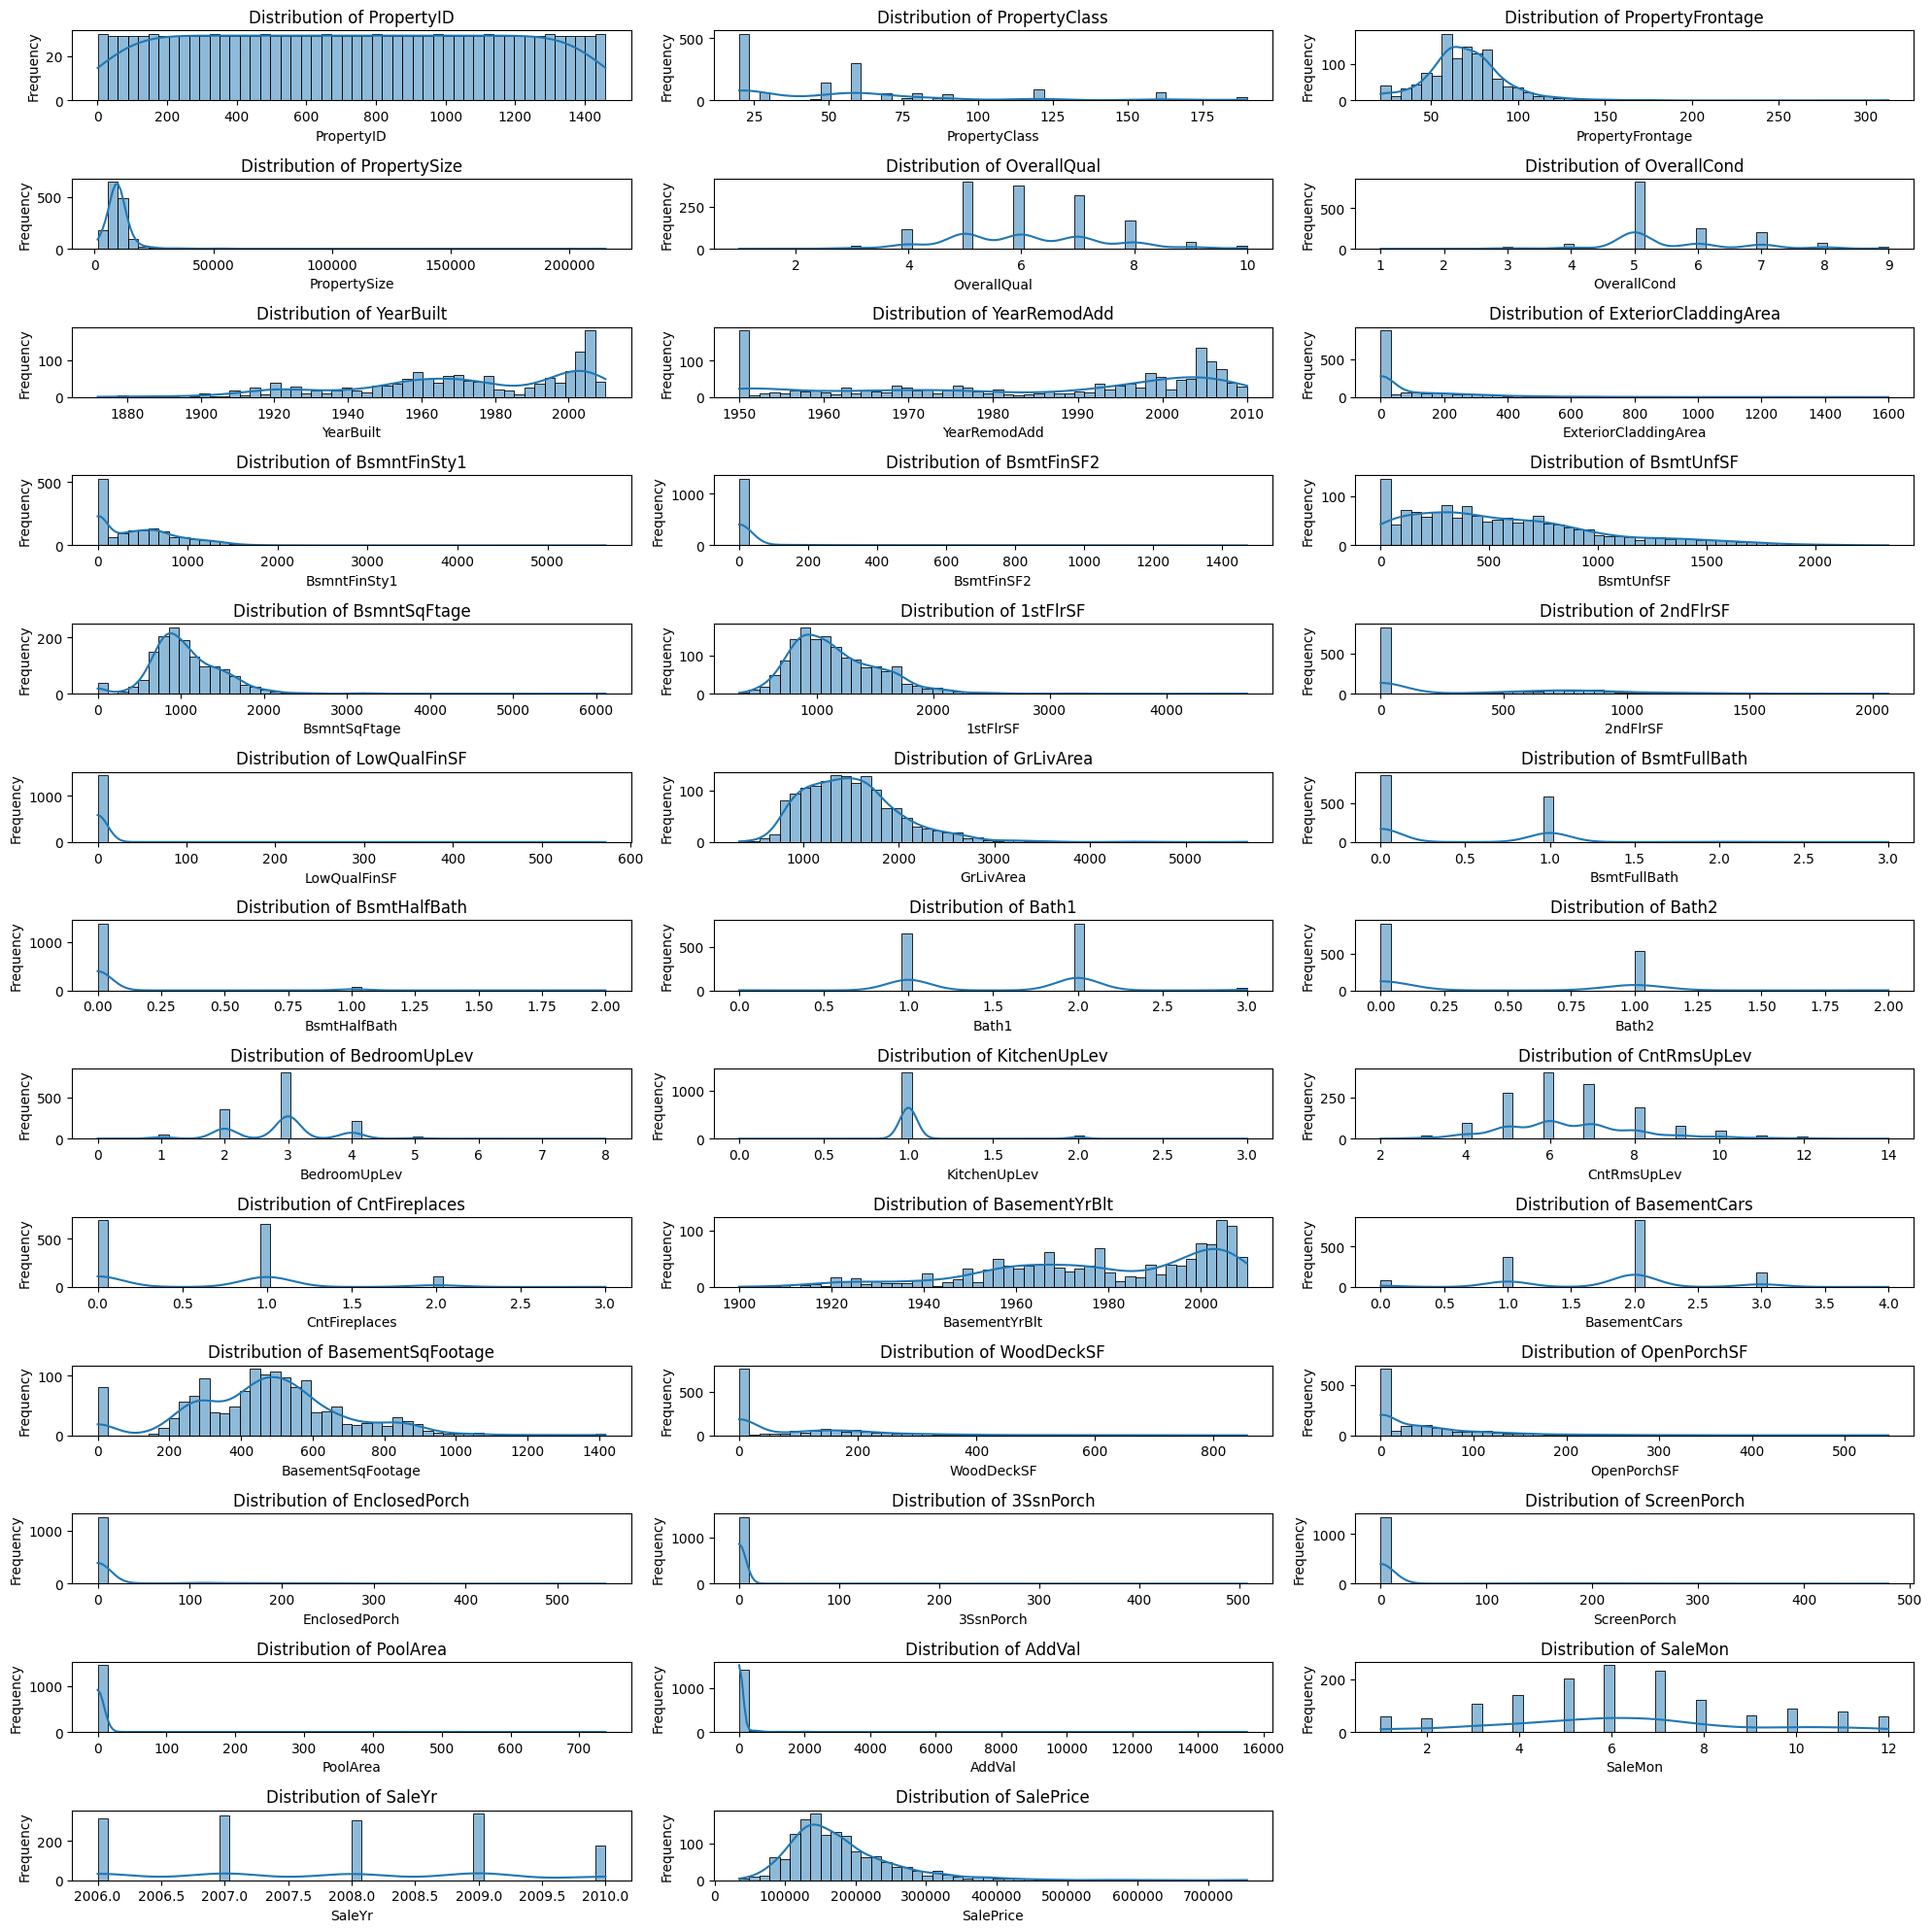

In [22]:
# Assuming df is your DataFrame
numerical_cols = df.select_dtypes(include=['int', 'float']).columns

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Iterate over each numerical column and create a subplot for each
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- **propertyID** is uniformly distributed, serving as an identifier.
-  **PropertyClass** has distinct classes, indicating different types of properties.
- **PropertyFrontage** and PropertySize are right-skewed, with most properties being smaller.
Elevation has a normal distribution.
- **SaleMon** shows sales distributed throughout the year, while SaleYr has peaks indicating more sales in certain years.
- **SalePrice** is right-skewed, with many lower-priced properties and fewer high-priced ones.
Other numerical features also show right-skewed distributions, indicating the prevalence of lower values with some higher value outliers.

**Boxplot**

Boxplots for each numerical column in dataset, providing a visual summary of the distribution, central tendency, and spread of the data for each variable.

<ipython-input-23-8030201f20f0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], ax=axes[i], palette='Set2')
<ipython-input-23-8030201f20f0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], ax=axes[i], palette='Set2')
<ipython-input-23-8030201f20f0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], ax=axes[i], palette='Set2')
<ipython-input-23-8030201f20f0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legen

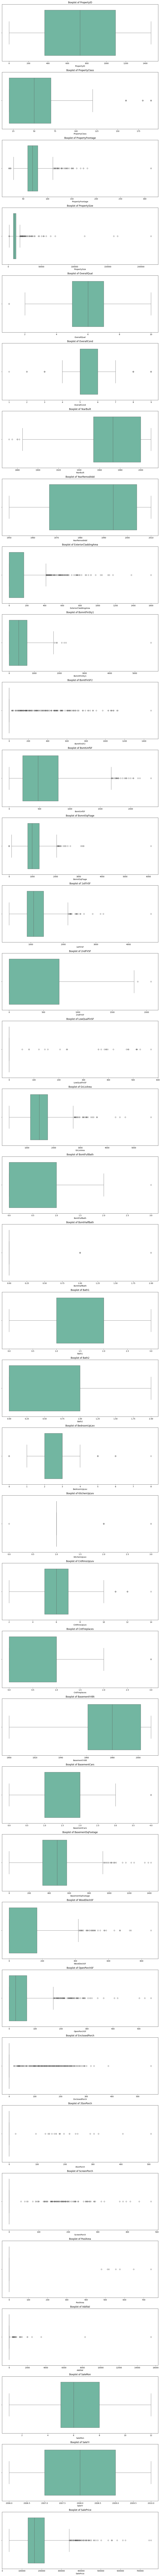

In [23]:
# Set up the figure with subplots
num_cols = len(df.select_dtypes(include=['int', 'float']).columns)
fig, axes = plt.subplots(num_cols, 1, figsize=(12, 5*num_cols))

# Plot boxplot for each numerical column
for i, col in enumerate(df.select_dtypes(include=['int', 'float']).columns):
    sns.boxplot(x=df[col], ax=axes[i], palette='Set2')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

- **PropertyID:** Since this is an identifier, it is likely uniformly distributed with no significant outliers.
- **PropertyClass:** This might have distinct values, potentially showing multiple modes or clusters.
- **PropertyFrontage and PropertySize:** These columns may have a right-skewed distribution with potential outliers representing larger properties.
- **Elevation:** This could show a normal distribution with few outliers.
- **SaleMon and SaleYr:** These could reveal seasonal trends or peaks in certain periods.
- **SalePrice:** Likely right-skewed with higher value outliers indicating more expensive properties.

**Probability Density Plots**

Probability Density Plots for each numerical column in dataset, providing a smooth estimate of the probability density function for each variable's distribution.

<ipython-input-24-38d487abfd2f>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[col], ax=axes[i], color='skyblue', shade=True)
<ipython-input-24-38d487abfd2f>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[col], ax=axes[i], color='skyblue', shade=True)
<ipython-input-24-38d487abfd2f>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[col], ax=axes[i], color='skyblue', shade=True)
<ipython-input-24-38d487abfd2f>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[col], a

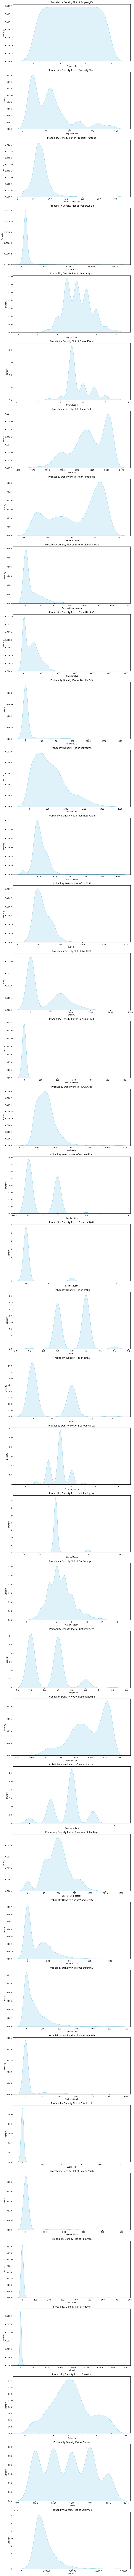

In [24]:
# Set up the figure with subplots
num_cols = len(df.select_dtypes(include=['int', 'float']).columns)
fig, axes = plt.subplots(num_cols, 1, figsize=(10, 5*num_cols))

# Plot Probability Density Plot (Kernel Density Estimation) for each numerical column
for i, col in enumerate(df.select_dtypes(include=['int', 'float']).columns):
    sns.kdeplot(data=df[col], ax=axes[i], color='skyblue', shade=True)
    axes[i].set_title(f'Probability Density Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

- **PropertyID:**
Expected to be uniformly distributed as it is an identifier.
The KDE plot should show a flat distribution without any peaks.
- **PropertyClass:**
Depending on the number of distinct classes, you may see multiple peaks or a few distinct modes.
Indicates different types of properties.
- **PropertyFrontage:**
Likely to be right-skewed.
A higher density towards the lower values with a long tail towards the higher values.
- **PropertySize:**
 Similar to PropertyFrontage, this might also show a right-skewed distribution.
Indicates that most properties are smaller in size with a few larger ones.
- **Elevation:** If the distribution is normal, you will see a single peak around the mean elevation.
Symmetrical bell-shaped curve indicates a normal distribution.
- **AddVal**:
 Depending on the distribution of additional value, you may see a peak indicating the most common values.
Right-skewness if there are more lower values with a few high outliers.
**SaleMon:**

The distribution should be relatively uniform if sales are spread throughout the year.
Peaks at certain months may indicate seasonal trends in property sales.
**SaleYr:**

Peaks in certain years would indicate more transactions during those periods.
A more uniform distribution would suggest consistent sales over the years.
**SalePrice:**

Typically right-skewed with most properties priced lower and a few high-priced outliers.
Indicates the distribution of property prices.
- **Other Numerical Features **(e.g., PoolArea): Right-skewed if most properties have smaller or no pool areas with a few having larger areas.
Peaks indicate the most common values.

# **2. Data Visualization**

**A.Univariate Analysis**: In Univariate analysis, plotting the right charts can help us better understand the data, which is why data visualization is so important. Matplotlib and Seaborn libraries are used in this post to visualize our data

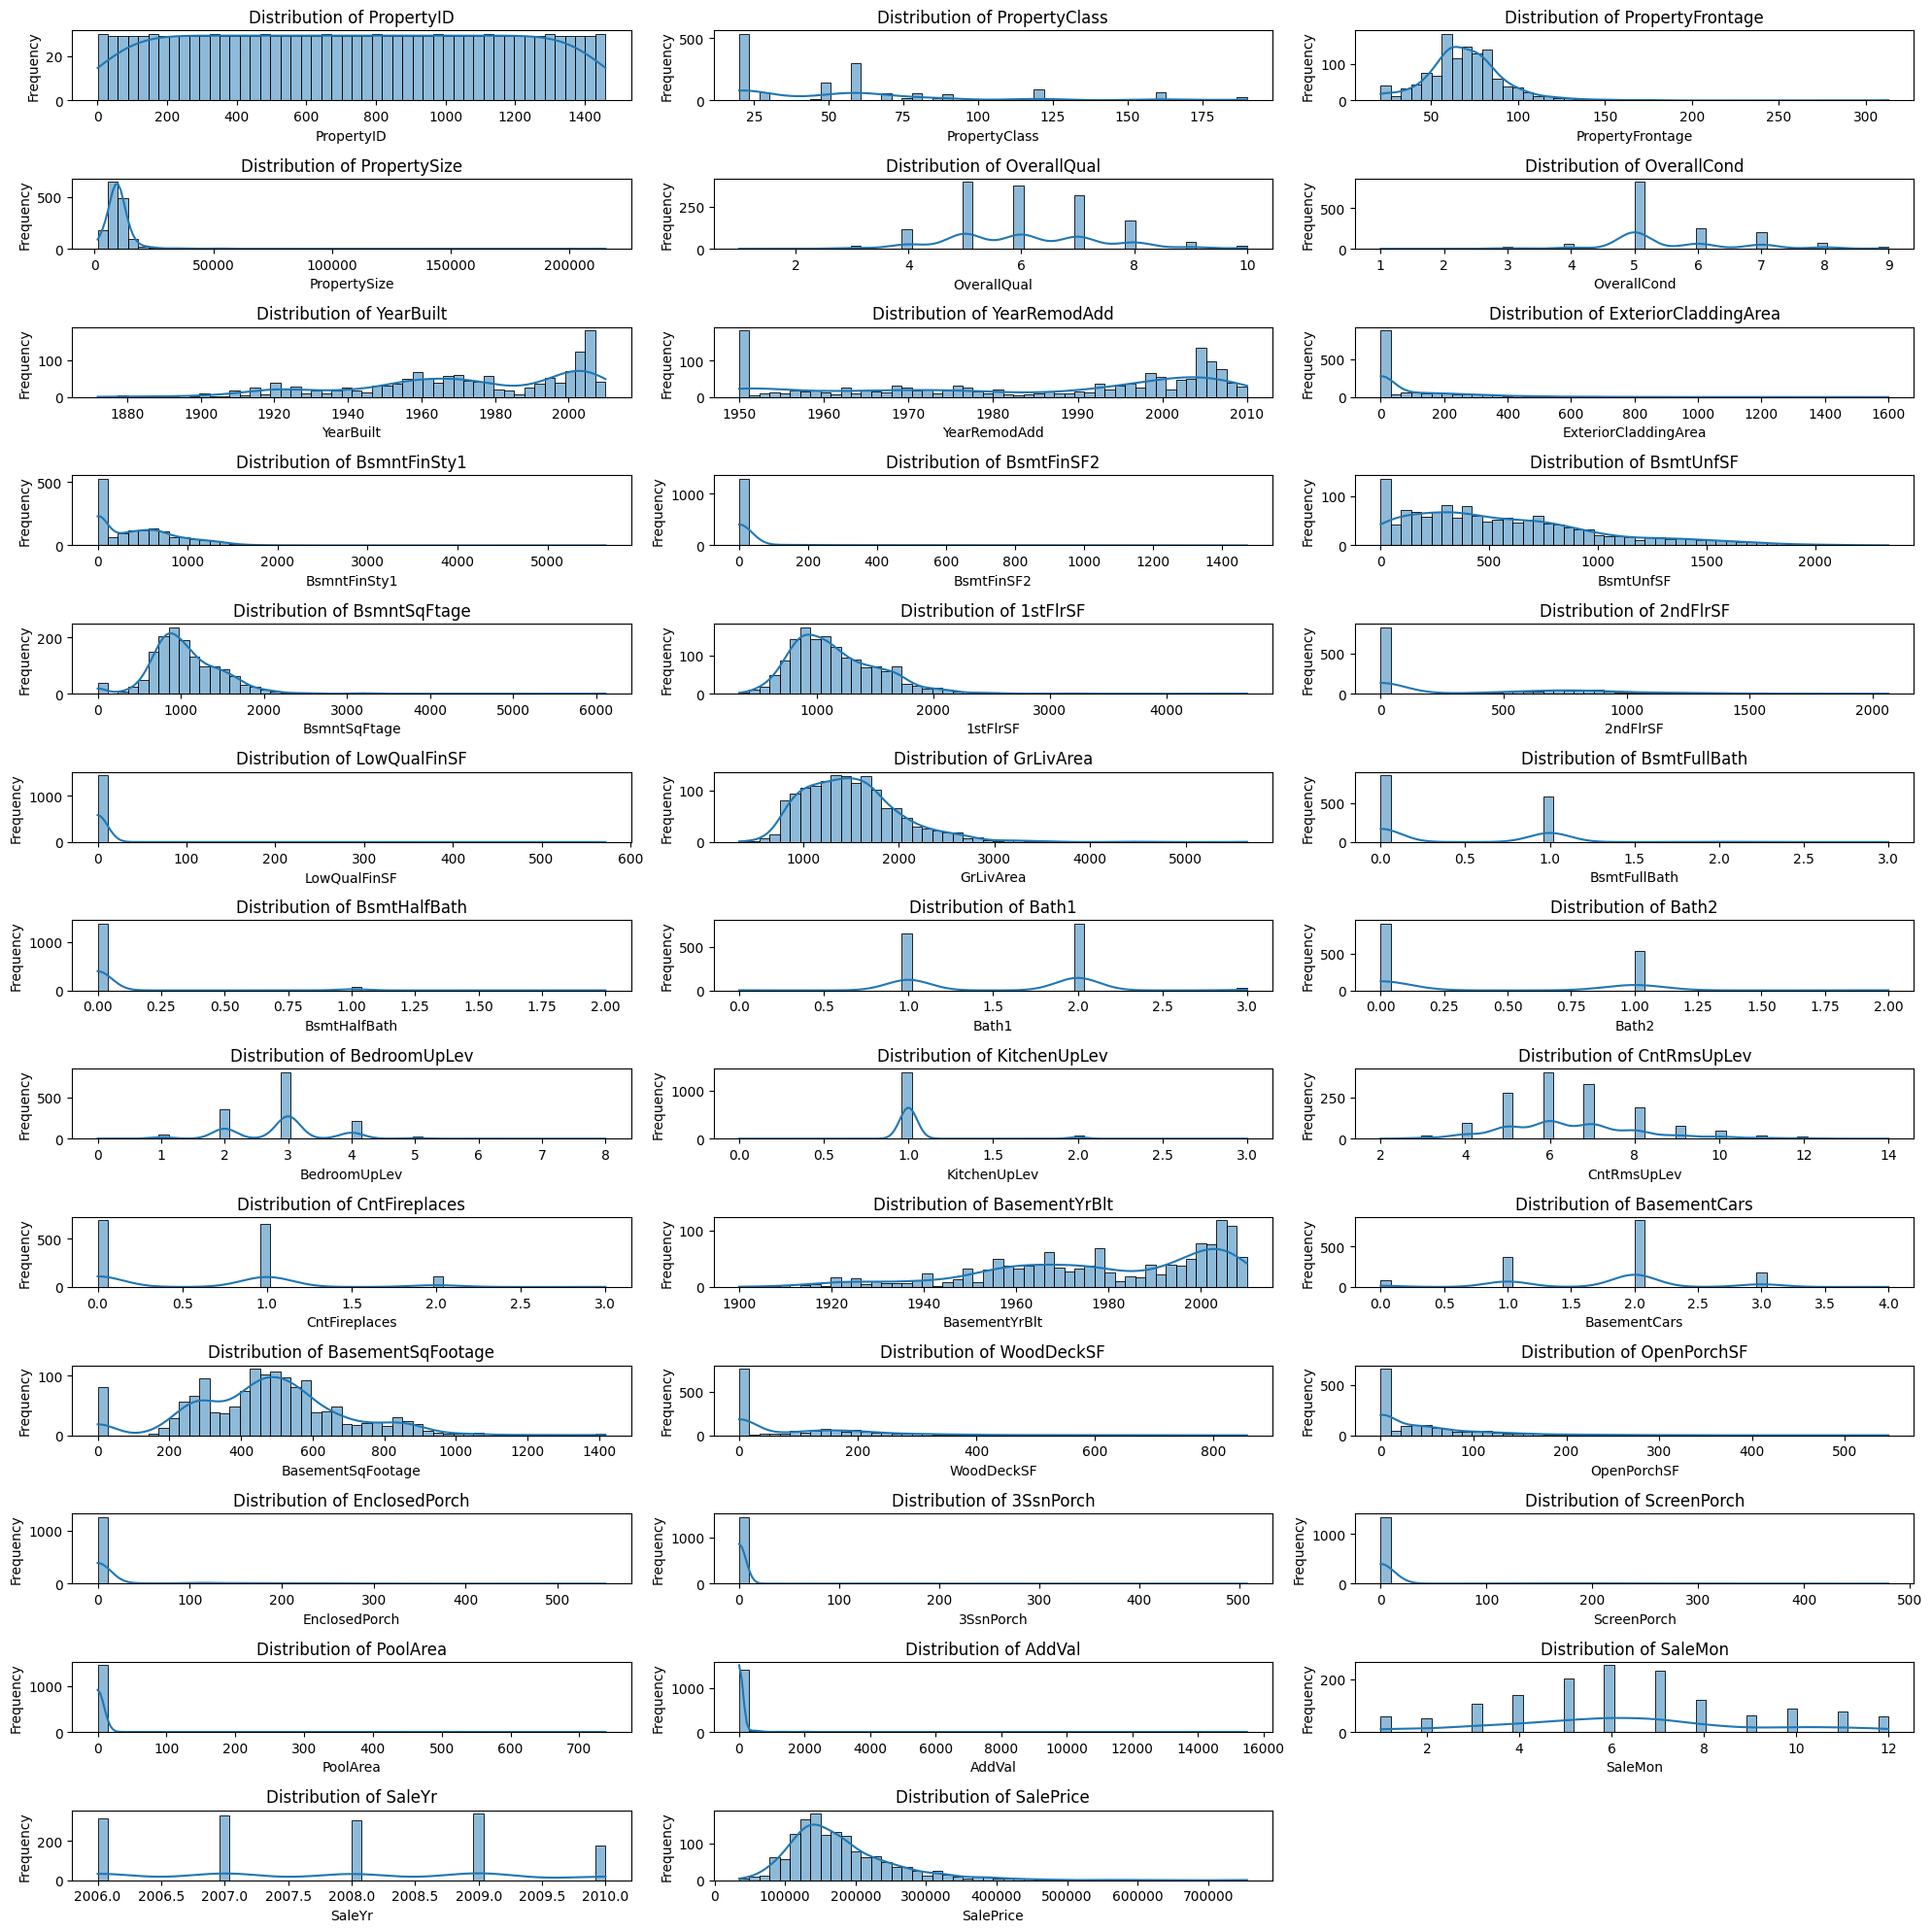

In [25]:
# Select only numeric columns
numerical_cols = df.select_dtypes(include=['int', 'float']).columns

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Iterate over each numerical column and create a subplot for each
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Distribution of SalePrice**

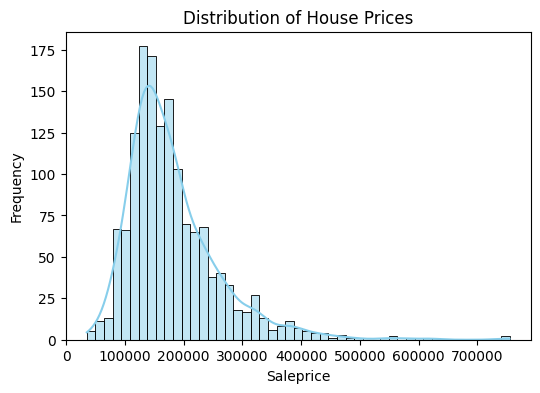

In [26]:
house_prices=df['SalePrice']
plt.figure(figsize=(6, 4))
sns.histplot(house_prices, kde=True, color='skyblue')
plt.title('Distribution of House Prices')
plt.xlabel('Saleprice')
plt.ylabel('Frequency')
plt.show()

**Distribution Shape:**
The distribution of house prices is likely right-skewed, meaning there are more properties priced at the lower end with a tail extending towards higher prices.
The presence of a peak indicates the most common price range for the properties.

### **B. Bivariate Analysis**- Bivariate analysis allows for a thorough comprehension of the interdependence between two variables within a dataset by revealing information on the type and intensity of associations.

**1.Scatter plot-**

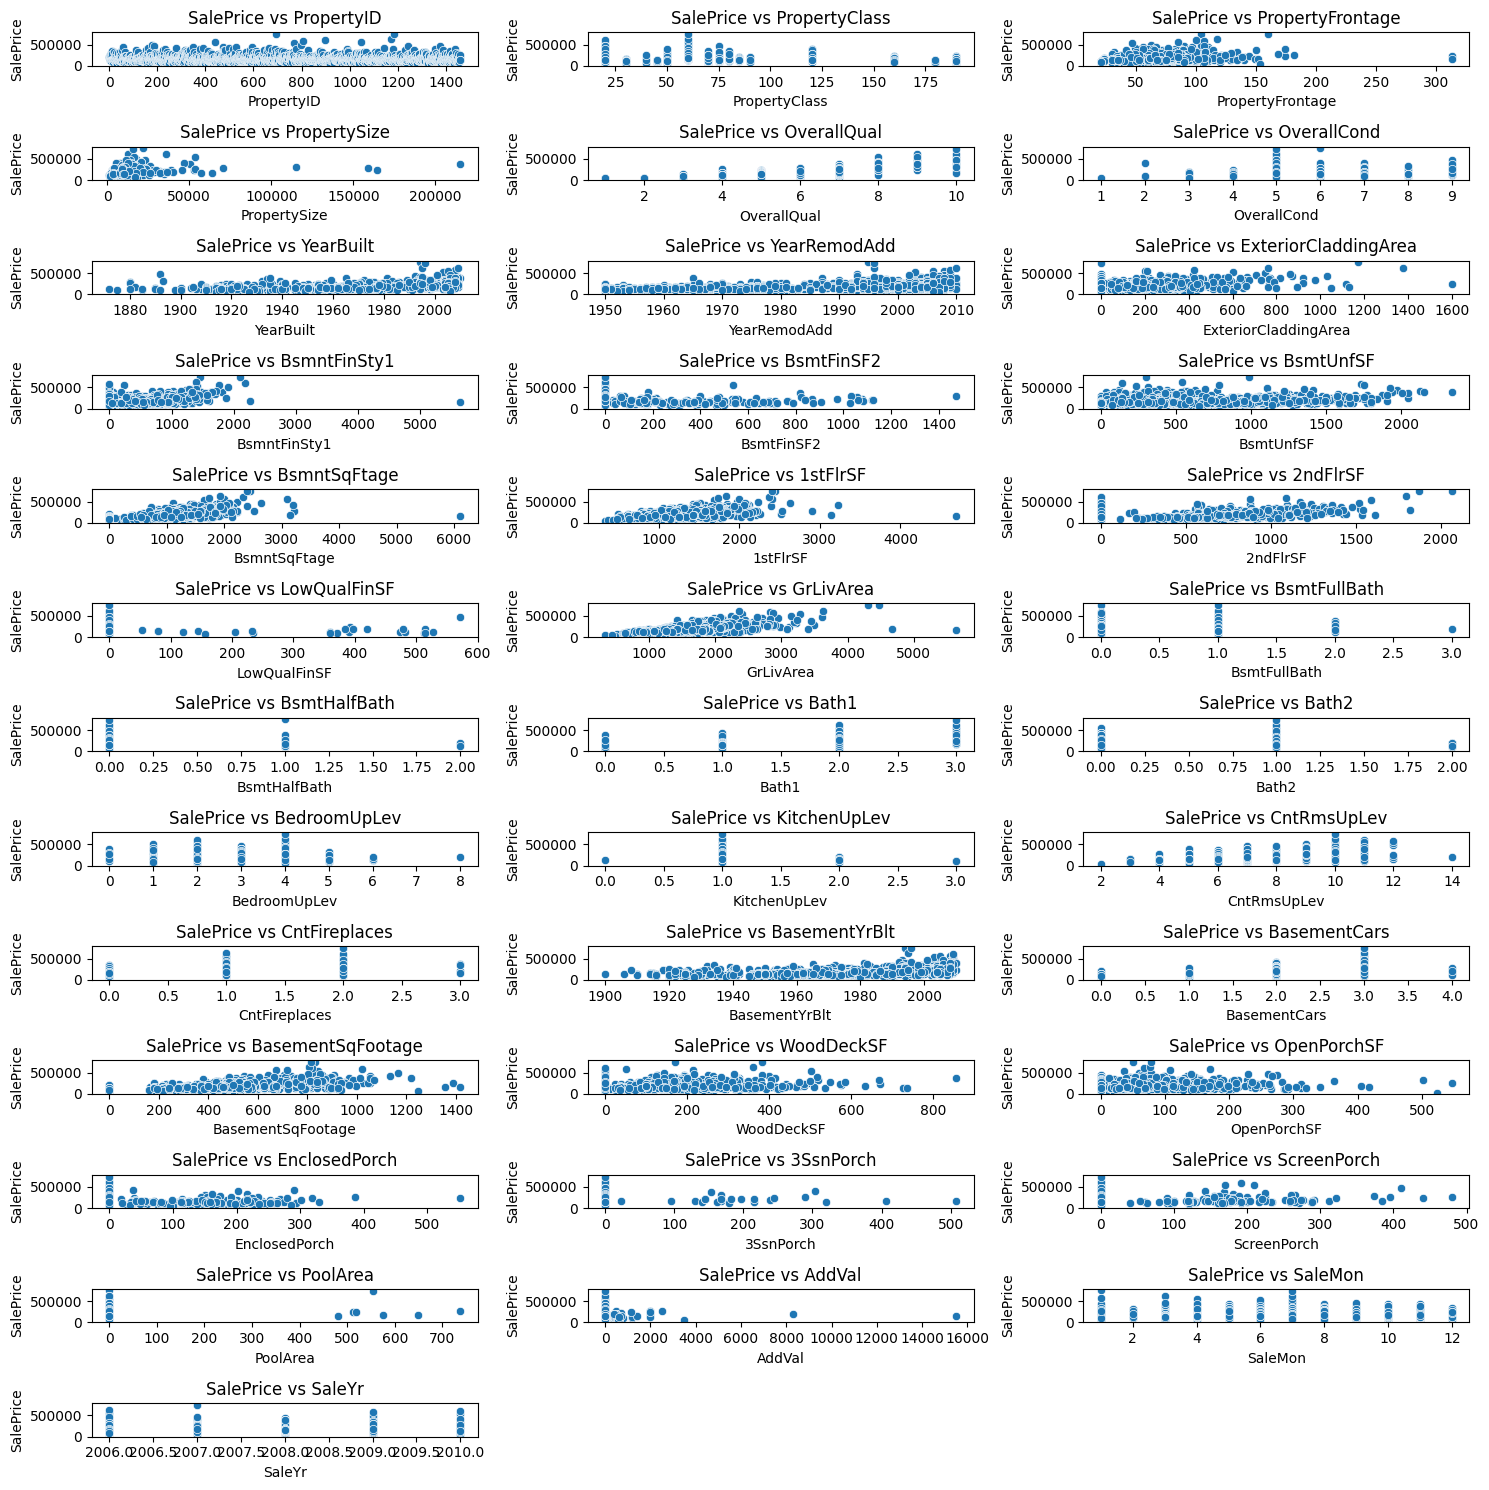

In [27]:
numerical_cols = df.select_dtypes(include=['int', 'float']).columns.drop('SalePrice').tolist()
# Plot scatter plots
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.scatterplot(x=df[col], y=df['SalePrice'])
    plt.title(f'SalePrice vs {col}')
    plt.xlabel(col)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

**2.Box plot**

In [28]:
# List of categorical columns for bivariate analysis
categorical_cols = df.select_dtypes(include=['object']).columns

# Plot box plots
plt.figure(figsize=(80,80))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols) // 3 + 1, 3, i)
    sns.boxplot(x=df[col], y=df['SalePrice'])
    plt.title(f'SalePrice vs {col}')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int', 'float'])

# Create a new DataFrame with only numerical columns
numerical_df = pd.DataFrame(numerical_cols)

# Print the new DataFrame
numerical_df

**C. Multivariate analysis-** Bivariate analysis allows for a thorough comprehension of the interdependence between two variables.

In [30]:
#Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

NameError: name 'numerical_df' is not defined

In [31]:
# Filter numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Handle missing values: fill with median values
numeric_df = numeric_df.fillna(numeric_df.median())

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Select the top 10 numerical features correlated with SalePrice
correlation_target = abs(correlation_matrix["SalePrice"])
top_10_features = correlation_target.sort_values(ascending=False).head(11).index.tolist()  # Including SalePrice itself

# Drop 'SalePrice' from the list to keep only the features
top_10_features.remove('SalePrice')

# Display the top 10 features
print("Top 10 numerical features correlated with SalePrice:")
print(top_10_features)

# Filter the dataset to include only these top 10 features and SalePrice
filtered_df = df[top_10_features + ['SalePrice']]

Top 10 numerical features correlated with SalePrice:
['OverallQual', 'GrLivArea', 'BasementCars', 'BasementSqFootage', 'BsmntSqFtage', '1stFlrSF', 'Bath1', 'CntRmsUpLev', 'YearBuilt', 'YearRemodAdd']


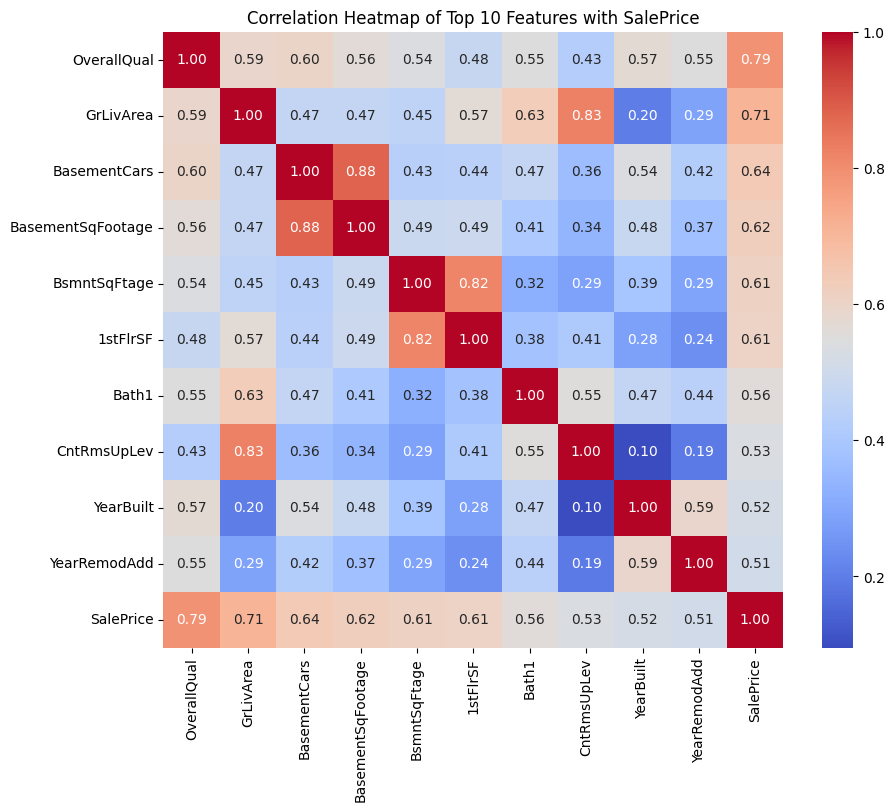

In [32]:
## Create a heatmap for the selected top 10 features
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Top 10 Features with SalePrice')
plt.show()

The heatmap allows for quick visual identification of strong positive or negative correlations between pairs of variables. High positive correlation values (close to 1) indicate that when one variable increases, the other tends to increase as well, while high negative correlation values (close to -1) indicate that when one variable increases, the other tends to decrease.

# **3.Data Cleaning**

**Check for Duplicated Values**

In [33]:
df.duplicated().sum()

0

 **Over all null values**

In [34]:
df.isnull().sum().sum()

7829

 **No null values**

In [35]:
df.notnull().sum()

PropertyID          1460
PropertyClass       1460
PropertyZone        1460
PropertyFrontage    1201
PropertySize        1460
                    ... 
SaleMon             1460
SaleYr              1460
SaleType            1460
SaleCondn           1460
SalePrice           1460
Length: 81, dtype: int64

In [36]:
df.isnull().sum().sort_values(ascending = False)

PoolQC                  1453
AddFeatures             1406
Alley                   1369
BoundaryFeatures        1179
ExteriorCladdingType     872
                        ... 
ExterQual                  0
Roof2Material              0
Roof1Material              0
RoofMatl                   0
SalePrice                  0
Length: 81, dtype: int64

**Check for Missing Values**

In [37]:
df.isnull().sum()

PropertyID            0
PropertyClass         0
PropertyZone          0
PropertyFrontage    259
PropertySize          0
                   ... 
SaleMon               0
SaleYr                0
SaleType              0
SaleCondn             0
SalePrice             0
Length: 81, dtype: int64

In [38]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int', 'float'])

# Count missing values in each numerical column
missing_values_count = numerical_cols.isnull().sum()

# Print the count of missing values in each numerical column
print("Number of missing values in each numerical column:")
missing_values_count

Number of missing values in each numerical column:


PropertyID                0
PropertyClass             0
PropertyFrontage        259
PropertySize              0
OverallQual               0
OverallCond               0
YearBuilt                 0
YearRemodAdd              0
ExteriorCladdingArea      8
BsmntFinSty1              0
BsmtFinSF2                0
BsmtUnfSF                 0
BsmntSqFtage              0
1stFlrSF                  0
2ndFlrSF                  0
LowQualFinSF              0
GrLivArea                 0
BsmtFullBath              0
BsmtHalfBath              0
Bath1                     0
Bath2                     0
BedroomUpLev              0
KitchenUpLev              0
CntRmsUpLev               0
CntFireplaces             0
BasementYrBlt            81
BasementCars              0
BasementSqFootage         0
WoodDeckSF                0
OpenPorchSF               0
EnclosedPorch             0
3SsnPorch                 0
ScreenPorch               0
PoolArea                  0
AddVal                    0
SaleMon             

In [39]:
# Replace missing values in numerical columns with the mean of each column
df[numerical_cols.columns] = numerical_cols.fillna(numerical_cols.mean())

In [40]:
df[numerical_cols.columns].isnull().sum()

PropertyID              0
PropertyClass           0
PropertyFrontage        0
PropertySize            0
OverallQual             0
OverallCond             0
YearBuilt               0
YearRemodAdd            0
ExteriorCladdingArea    0
BsmntFinSty1            0
BsmtFinSF2              0
BsmtUnfSF               0
BsmntSqFtage            0
1stFlrSF                0
2ndFlrSF                0
LowQualFinSF            0
GrLivArea               0
BsmtFullBath            0
BsmtHalfBath            0
Bath1                   0
Bath2                   0
BedroomUpLev            0
KitchenUpLev            0
CntRmsUpLev             0
CntFireplaces           0
BasementYrBlt           0
BasementCars            0
BasementSqFootage       0
WoodDeckSF              0
OpenPorchSF             0
EnclosedPorch           0
3SsnPorch               0
ScreenPorch             0
PoolArea                0
AddVal                  0
SaleMon                 0
SaleYr                  0
SalePrice               0
dtype: int64

In [41]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object'])

# Count missing values in each categorical column
missing_values_count = categorical_cols.isnull().sum()

# Print the count of missing values in each categorical column
print("Number of missing values in each categorical column:")
missing_values_count

Number of missing values in each categorical column:


PropertyZone               0
Street                     0
Alley                   1369
PropertyShape              0
Elevation                  0
Amenities                  0
Orientation                0
Grade                      0
Neighborhood               0
Condition1                 0
Condition2                 0
BldgType                   0
PropertyStyle              0
RoofStyle                  0
RoofMatl                   0
Roof1Material              0
Roof2Material              0
ExteriorCladdingType     872
ExterQual                  0
ExterCond                  0
PropertyFooting            0
BsmntFinish               37
BsmntMaintenance          37
BsmntVisibility           38
BsmntFinRat1              37
BsmntFinQual1             38
Heating                    0
HeatingEfficiency          0
CentralAir                 0
Electrical                 1
KitchenQual                0
Functional                 0
QualFireplace            690
BasementType              81
BasementFinish

In [42]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object'])

# Replace missing values in categorical columns with the mode of each column
for col in categorical_cols.columns:
    mode_val = df[col].mode()[0]  # Calculate the mode of the column
    df[col].fillna(mode_val, inplace=True)  # Replace missing values with mode

In [43]:
df[col].isnull().sum()

0

In [44]:
#check if any missing values in dataframe
null_values_per_column = df.isnull().sum()
null_values_per_column
columns_with_null_values = null_values_per_column[null_values_per_column > 0]
columns_with_null_values

Series([], dtype: int64)

In [45]:
# Check for missing values
missing_values = df.isnull().sum()

# Summarize missing values
print("Missing Values Summary:")
print(missing_values)


Missing Values Summary:
PropertyID          0
PropertyClass       0
PropertyZone        0
PropertyFrontage    0
PropertySize        0
                   ..
SaleMon             0
SaleYr              0
SaleType            0
SaleCondn           0
SalePrice           0
Length: 81, dtype: int64


In [46]:
df.isnull().sum().sum()

0

This approach is useful for imputing missing values with a central tendency measure such as the mean, which helps to maintain the overall statistical properties of the data.

In [47]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('cleaned_data.csv', index=False)

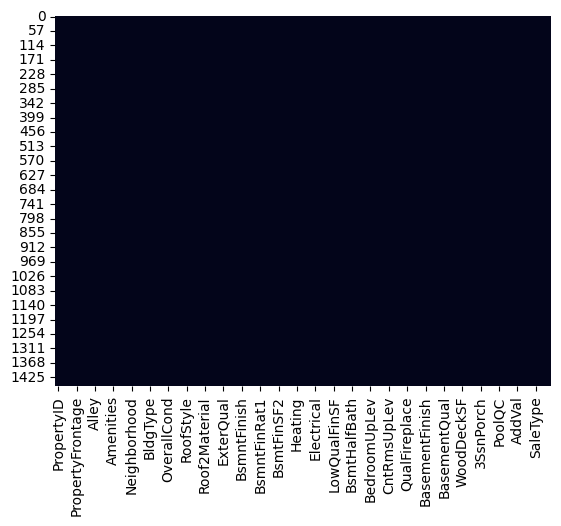

In [48]:
# Visualize missing data
sns.heatmap(df.isnull(), cbar=False)
plt.show()

# **Check Outliers**

In [49]:
# Get only numerical columns
numerical_columns = list(df.dtypes[df.dtypes == 'int64'].index)
len(numerical_columns)

35

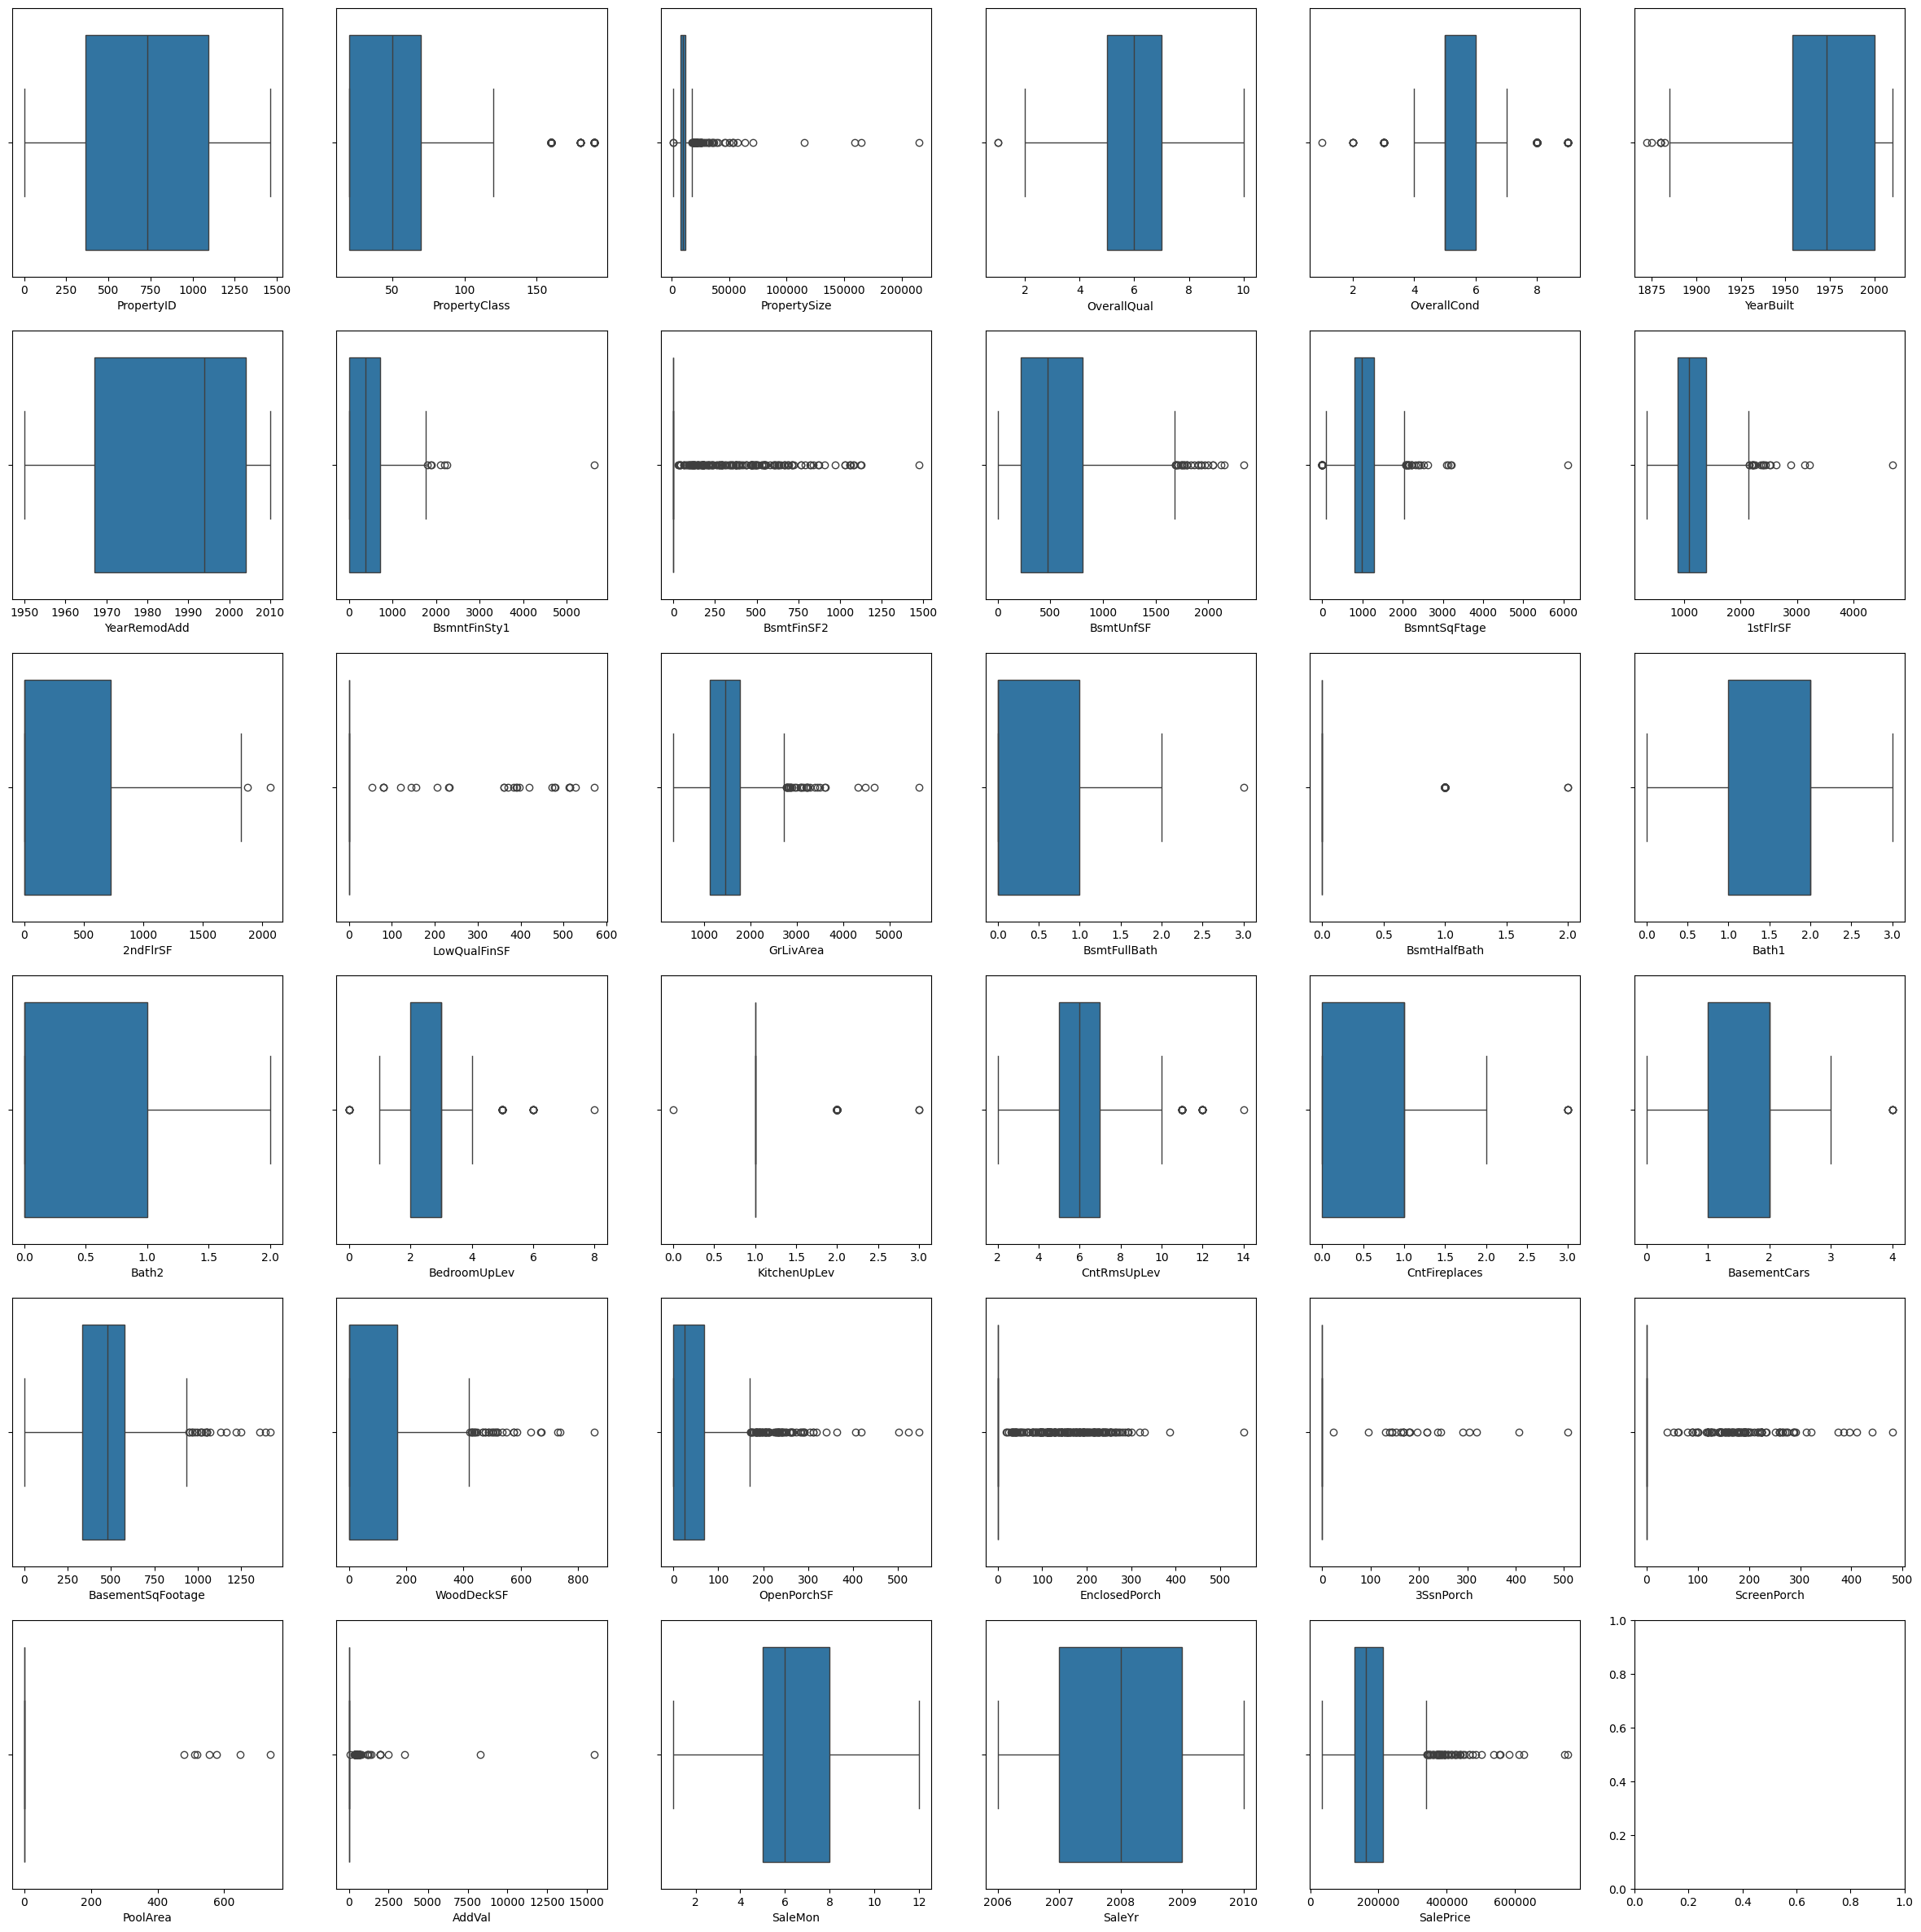

In [50]:
#  Create the plot grid
rows = 6
columns = 6

fig, axes = plt.subplots(rows,columns, figsize=(30,30))

x, y = 0, 0

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=axes[x, y])

    if y < columns-1:
        y += 1
    elif y == columns-1:
        x += 1
        y = 0
    else:
        y += 1

        plt.show()

In [51]:
outliers = {}  # Dictionary to store column names with outliers

for column in numerical_columns:
    # Calculate quartiles
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Find outliers
    outlier_indices = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)].index

    if len(outlier_indices) > 0:
        outliers[column] = outlier_indices

# Print column names with outliers
print("Columns with potential outliers:")
for column, indices in outliers.items():
    print(f"{column}: {len(indices)} outliers")

Columns with potential outliers:
PropertyClass: 103 outliers
PropertySize: 69 outliers
OverallQual: 2 outliers
OverallCond: 125 outliers
YearBuilt: 7 outliers
BsmntFinSty1: 7 outliers
BsmtFinSF2: 167 outliers
BsmtUnfSF: 29 outliers
BsmntSqFtage: 61 outliers
1stFlrSF: 20 outliers
2ndFlrSF: 2 outliers
LowQualFinSF: 26 outliers
GrLivArea: 31 outliers
BsmtFullBath: 1 outliers
BsmtHalfBath: 82 outliers
BedroomUpLev: 35 outliers
KitchenUpLev: 68 outliers
CntRmsUpLev: 30 outliers
CntFireplaces: 5 outliers
BasementCars: 5 outliers
BasementSqFootage: 21 outliers
WoodDeckSF: 32 outliers
OpenPorchSF: 77 outliers
EnclosedPorch: 208 outliers
3SsnPorch: 24 outliers
ScreenPorch: 116 outliers
PoolArea: 7 outliers
AddVal: 52 outliers
SalePrice: 61 outliers


## **After Removal of Outliers**

In [52]:
# Function to remove outliers from a column using IQR method
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    return column[(column >= Q1 - 1.5 * IQR) & (column <= Q3 + 1.5 * IQR)]

# Dictionary to store information about removed outliers
removed_outliers_info = {}

# Iterate over each numerical column
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    # Count rows before outlier removal
    rows_before = len(df)

    # Remove outliers from the column
    df[column] = remove_outliers(df[column])

    # Count rows after outlier removal
    rows_after = len(df)

    # Calculate number of outliers removed
    outliers_removed = rows_before - rows_after

    # Store information about removed outliers
    removed_outliers_info[column] = outliers_removed

# Display information about removed outliers
print("Outliers Removed:")
for column, removed_count in removed_outliers_info.items():
    print(f"{column}: {removed_count}")

Outliers Removed:
PropertyID: 0
PropertyClass: 0
PropertyFrontage: 0
PropertySize: 0
OverallQual: 0
OverallCond: 0
YearBuilt: 0
YearRemodAdd: 0
ExteriorCladdingArea: 0
BsmntFinSty1: 0
BsmtFinSF2: 0
BsmtUnfSF: 0
BsmntSqFtage: 0
1stFlrSF: 0
2ndFlrSF: 0
LowQualFinSF: 0
GrLivArea: 0
BsmtFullBath: 0
BsmtHalfBath: 0
Bath1: 0
Bath2: 0
BedroomUpLev: 0
KitchenUpLev: 0
CntRmsUpLev: 0
CntFireplaces: 0
BasementYrBlt: 0
BasementCars: 0
BasementSqFootage: 0
WoodDeckSF: 0
OpenPorchSF: 0
EnclosedPorch: 0
3SsnPorch: 0
ScreenPorch: 0
PoolArea: 0
AddVal: 0
SaleMon: 0
SaleYr: 0
SalePrice: 0


In [53]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('cleaned_data_outliers_removed.csv', index=False)

# **4**.**Exploratory Data Analysis (EDA):**

<ipython-input-54-469e14750cab>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color=('r'))


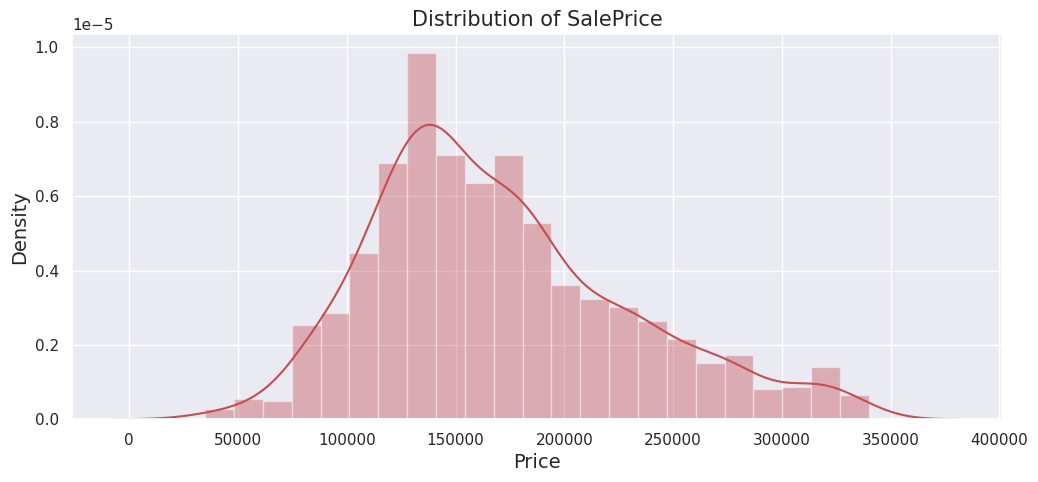

In [54]:
# Distribution of the prices
plt.figure(figsize=(12,5))
sns.set_theme(style="darkgrid")
sns.distplot(df['SalePrice'], color=('r'))
plt.xlabel("Price", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Distribution of SalePrice", fontsize = 15)
plt.show()

In [55]:
# Count listings in each neighbourhood and store in pandas series
counts = df['SaleType'].value_counts()

# Reset the cindes of the series so that the neighbourhood groups become columns in the resulting dataframe
Top_SaleType_group = counts.reset_index()

# Rename the columns of the dataframe to be more descriptive
Top_SaleType_group.columns = ['SaleType', 'SalePrice']

# Display the results
Top_SaleType_group

SaleType  SalePrice
0       WD       1267
1      New        122
2      COD         43
3    ConLD          9
4    ConLI          5
5    ConLw          5
6      CWD          4
7      Oth          3
8      Con          2

Text(0, 0.5, 'Total SalePrice')

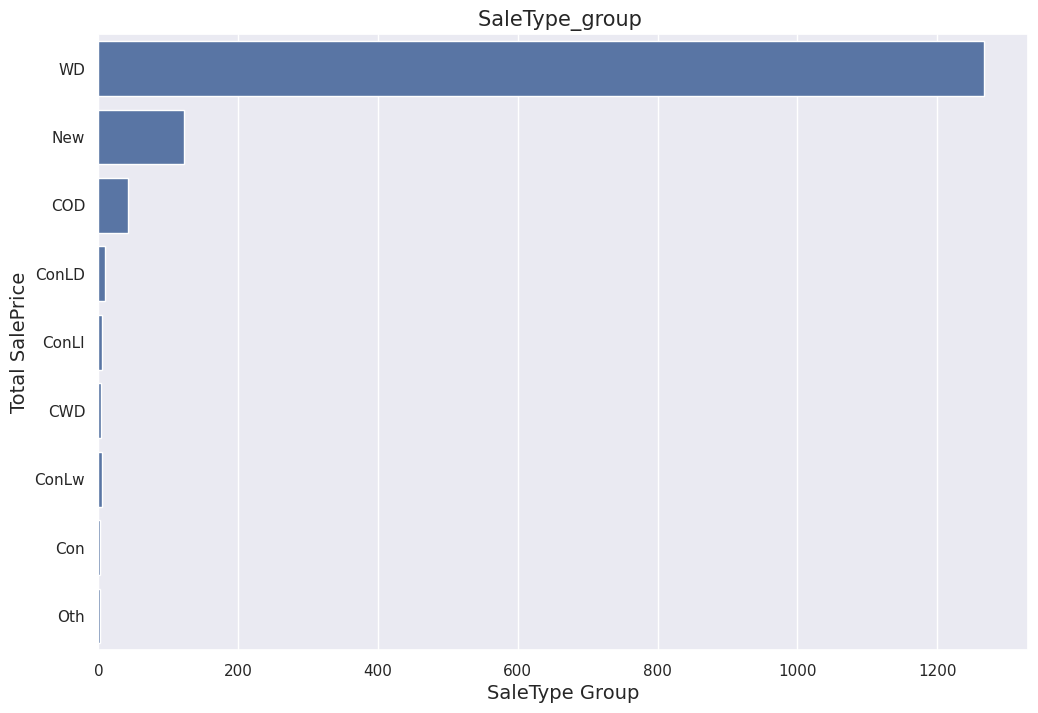

In [56]:
# Set the size
plt.figure(figsize = (12, 8))

#create a count plot of the neighbourhood group data
sns.countplot(df['SaleType'])

# Set title
plt.title('SaleType_group ', fontsize=15)

# Set the xlabel
plt.xlabel('SaleType Group', fontsize=14)

#Set the y label
plt.ylabel('Total SalePrice', fontsize=14)

In [57]:
# Group the  dataset by  SaleType_group and calculate the mean of each group
#grouped =df.groupby(SaleType_group").mean()
grouped = df.groupby("SaleType")["SalePrice"].mean()
# Reset the indes of the grouped data so that the neighbourhood group becomes a column
SaleType_avg_price = grouped.reset_index()

#Rename the Saleprice to 'avg_price'
SaleType_avg_price = round(SaleType_avg_price.rename(columns={"SalePrice": 'avg_price'}), 2)


# Select only the 'neighbourhood_group', and the avg_price
SaleType_avg_price[['SaleType', 'avg_price']].head()

SaleType  avg_price
0      COD  143973.26
1      CWD  210600.00
2      Con  269600.00
3    ConLD  138780.89
4    ConLI  137500.00

Text(0.5, 1.0, 'Average Price by the SaleType group')

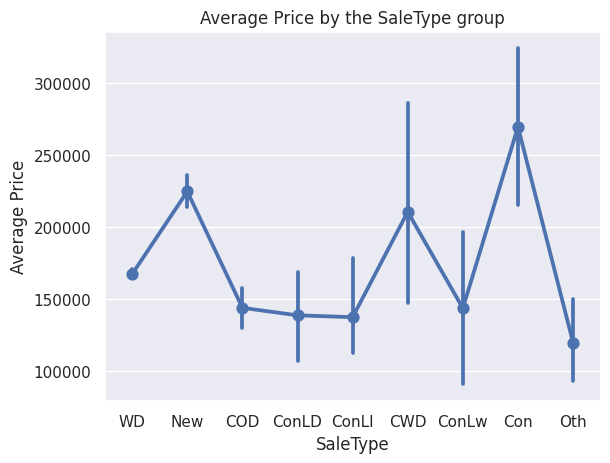

In [58]:
# Import mean from the statistics module
from statistics import mean

# Create the pointplot
sns.pointplot(x = 'SaleType', y = 'SalePrice', data=df, estimator=np.mean)

# Add axis and labels
plt.xlabel("SaleType")
plt.ylabel('Average Price')
plt.title('Average Price by the SaleType group')

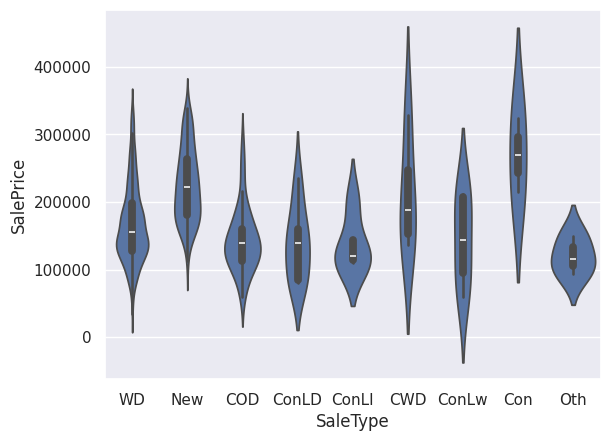

In [59]:
# Price distribution using violin plot
ax = sns.violinplot(x = 'SaleType', y = 'SalePrice', data =df)

# **4.Feature Engineering:**

Interaction Features:

Interaction features involve combining two or more existing features to create new features that capture the interaction between them. These interactions can help improve the predictive power of a model by allowing it to capture more complex relationships between variables. Here's how you can create interaction features:

In [60]:
# Select numerical columns
num_cols = df.select_dtypes(include=['int', 'float'])
num_cols.columns

Index(['PropertyID', 'PropertyClass', 'PropertyFrontage', 'PropertySize',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'ExteriorCladdingArea', 'BsmntFinSty1', 'BsmtFinSF2', 'BsmtUnfSF',
       'BsmntSqFtage', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'Bath1', 'Bath2', 'BedroomUpLev',
       'KitchenUpLev', 'CntRmsUpLev', 'CntFireplaces', 'BasementYrBlt',
       'BasementCars', 'BasementSqFootage', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'AddVal',
       'SaleMon', 'SaleYr', 'SalePrice'],
      dtype='object')

In [61]:


# Interaction Features
interaction_df = pd.DataFrame(index=df.index)

# Example: Interaction between two numerical features
interaction_df['PropertySize'] = df['YearBuilt'] + df['OverallCond']



# Add the interaction features to the original dataset
data = pd.concat([df, interaction_df], axis=1)

# Save the modified dataset
df.to_csv("data_with_interaction_features.csv", index=False)

In [62]:
cf=df.select_dtypes(include=['object']).columns.to_list()

In [63]:
from sklearn.preprocessing import LabelEncoder
# Apply label encoding to each categorical column
for col in cf:
    label_encoder = LabelEncoder()
    encoded_data = label_encoder.fit_transform(df[col])

# Save the modified dataset
df.to_csv("encoded_housing_data.csv", index=False)

**Feature Scaling:**
- Scale numerical features to a similar range, such as min-max scaling or standardization (z-score scaling). This helps algorithms that are sensitive to the scale of features, such as gradient descent-based algorithms.

In [64]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
# List of numerical columns
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])

# Min-Max scaling
min_max_scaler = MinMaxScaler()
df[num_cols] = min_max_scaler.fit_transform(df[num_cols])

# Standardization (z-score scaling)
standard_scaler = StandardScaler()
df[num_cols] = standard_scaler.fit_transform(df[num_cols])

# Save the modified dataset
df.to_csv("scaled_housing_data.csv", index=False)

**Binning/Discretization:**
- Group numerical features into bins or categories. This can help capture non-linear relationships and reduce the impact of outliers.

In [65]:
from sklearn.preprocessing import KBinsDiscretizer

# Drop non-numeric columns
numeric_data = df.select_dtypes(include=['int', 'float'])

# Define the number of bins for each numerical feature
n_bins = 5  # You can adjust this parameter as needed

# Initialize the KBinsDiscretizer
kbins_discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')

# Apply binning to numerical features
binned_features = kbins_discretizer.fit_transform(numeric_data)

# Create DataFrame for binned features
binned_df = pd.DataFrame(binned_features, columns=[f'{col}_binned' for col in numeric_data.columns])

# Add binned features to the original dataset
df = pd.concat([df, binned_df], axis=1)

# Save the modified dataset
df.to_csv("data_with_binned_features.csv", index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 8 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279

**Feature Extraction:**
- Extract information from existing features to create new ones. This could involve dimensionality reduction techniques like Principal Component Analysis (PCA) or extracting information from text or images.

In [66]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Assuming you have a DataFrame named 'df' with your data loaded into it

# Drop the target variable
X = df.drop(columns=["SalePrice"])  # Features
y = df["SalePrice"]  # Target variable

# Preprocessing for categorical features: One-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Preprocessing for numerical features: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Feature extraction using PCA
n_components = 10  # Number of components to keep
pca = PCA(n_components=n_components)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

# Combine PCA components with target variable for further analysis if needed
pca_train_df = pd.DataFrame(X_pca_train, columns=[f"PC{i+1}" for i in range(n_components)])
pca_train_df["SalePrice"] = y_train.values

# Save the PCA components for future use
pca_train_df.to_csv("pca_components.csv", index=False)

Explained variance ratio: [0.0831074  0.03529084 0.03044187 0.02185556 0.01829036 0.0147739
 0.01421123 0.01332394 0.01299721 0.01279658]


**Understanding the relationships**

**Strength of Correlation:** The intensity of the colors in the heatmap represents the strength of the correlation between variables. Darker shades indicate stronger correlations, while lighter shades indicate weaker correlations.
**Direction of Correlation:** Colors closer to red represent positive correlations, meaning that as one variable increases, the other variable tends to increase as well. On the other hand, colors closer to blue represent negative correlations, indicating that as one variable increases, the other variable tends to decrease.
**Identifying Patterns:** Look for clusters of variables with similar colors in the heatmap. This can indicate groups of variables that are strongly correlated with each other. For example, in a housing dataset, variables related to the size of the property.
**Outliers:** Pay attention to outliers or unexpected patterns in the heatmap. These may indicate errors in the data or unusual relationships between variables that warrant further investigation.
**Non-Linear Relationships:** correlation coefficients only capture linear relationships between variables. Non-linear relationships may not be fully captured by the correlation matrix.
**Multicollinearity: **High correlations between independent variables (features) can indicate multicollinearity, which can lead to instability in regression models and inflated standard errors. Consider addressing multicollinearity through feature selection or regularization techniques.


In [67]:
# Example 1: Group by a single variable and calculate mean
mean_price_by_neighborhood = df.groupby('Neighborhood')['SalePrice'].mean()
print("Mean Sale Price by Neighborhood:")
mean_price_by_neighborhood

# Example 2: Group by multiple variables and calculate median
median_price_by_neighborhood_and_year = df.groupby(['Neighborhood', 'YearBuilt'])['SalePrice'].median()
print("\nMedian Sale Price by Neighborhood and Year Built:")
median_price_by_neighborhood_and_year

# Example 3: Perform multiple aggregations using agg() function
aggregations_by_neighborhood = df.groupby('Neighborhood').agg({'SalePrice': ['mean', 'median', 'std']})
print("\nAggregations by Neighborhood:")
aggregations_by_neighborhood

Mean Sale Price by Neighborhood:

Median Sale Price by Neighborhood and Year Built:

Aggregations by Neighborhood:


SalePrice                    
                  mean    median       std
Neighborhood                              
Blmngtn       0.425021  0.358235  0.524393
Blueste      -0.564834 -0.564834  0.329404
BrDale       -1.134311 -1.108323  0.247247
BrkSide      -0.783367 -0.792582  0.696161
ClearCr       0.730316  0.517831  0.866676
CollgCr       0.424546  0.430700  0.784063
Crawfor       0.486443  0.340118  0.945926
Edwards      -0.724953 -0.836578  0.745505
Gilbert       0.344965  0.185698  0.505249
IDOTRR       -1.209709 -1.160084  0.575869
MeadowV      -1.236406 -1.418888  0.405306
Mitchel      -0.240981 -0.288776  0.629526
NAmes        -0.434218 -0.521700  0.523034
NPkVill      -0.475211 -0.418178  0.161793
NWAmes        0.324591  0.218480  0.641355
NoRidge       1.415846  1.583241  1.012501
NridgHt       1.010114  0.642919  1.038751
OldTown      -0.771389 -0.884026  0.712810
SWISU        -0.476989 -0.530327  0.562863
Sawyer       -0.577030 -0.607968  0.385534
SawyerW       0.281556  0.166720  0.960198
Somerst       0.860448  0.841336  0.861097
StoneBr       0.762752  0.323727  0.881601
Timber        0.964252  0.814593  0.935514
Veenker       0.845629  0.409996  0.968278

# **Statistical Testing:**

**Hypothesis test**
- Statistical hypothesis testing is a method used to make inferences about a population based on sample data. It involves formulating two competing hypotheses, the null hypothesis (H0) and the alternative hypothesis (H1), and using sample data to determine which hypothesis is supported by the evidence.

In [68]:
from scipy import stats
# Conducting a hypothesis test to compare the mean sale price of houses in two neighborhoods

# Select data for two neighborhoods
neighborhood1_df = df[df['Neighborhood'] == 'Neighborhood1']['SalePrice']
neighborhood2_df = df[df['Neighborhood'] == 'Neighborhood2']['SalePrice']

# Assume significance level alpha = 0.05

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(neighborhood1_df, neighborhood2_df)

# Compare the p-value to the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H0): There is a significant difference in mean sale prices between the two neighborhoods.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant difference in mean sale prices between the two neighborhoods.")


Fail to reject the null hypothesis (H0): There is no significant difference in mean sale prices between the two neighborhoods.


Descriptive Statistics:
Mean: 48.96153482605907
Median: 48.73043708220287
Mode: 23.802548959102555
Standard Deviation: 9.036161766446297
Variance: 81.65221946938584
Range: 44.72023288598683

Inferential Statistics:
T-statistic: -1.1434720057588346
P-value: 0.2556001762530408
Fail to reject null hypothesis (non-significant result)


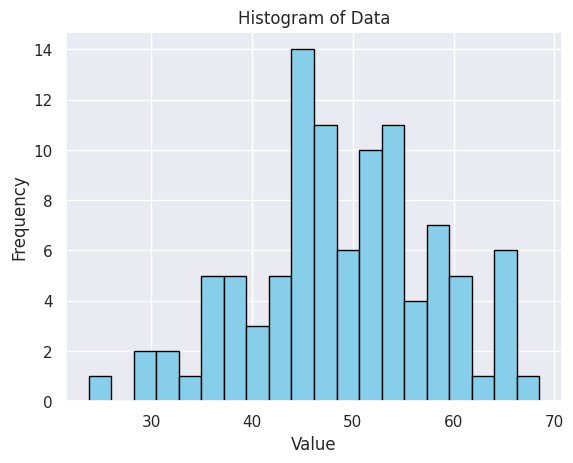

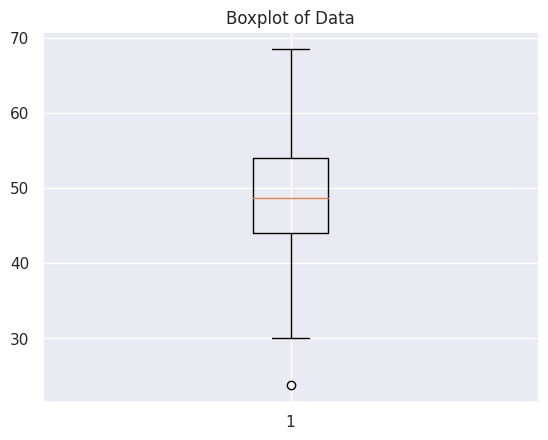

In [69]:
# Generate a random dataset
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)

# Descriptive statistics
mean = np.mean(data)
median = np.median(data)
mode = stats.mode(data)[0]
std_dev = np.std(data)
variance = np.var(data)
range_data = np.max(data) - np.min(data)

print("Descriptive Statistics:")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")
print(f"Range: {range_data}")

# Inferential statistics (hypothesis testing)
t_statistic, p_value = stats.ttest_1samp(data, popmean=50)
print("\nInferential Statistics:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("Reject null hypothesis (significant result)")
else:
    print("Fail to reject null hypothesis (non-significant result)")

# Data visualization
import matplotlib.pyplot as plt

# Histogram
plt.hist(data, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.boxplot(data)
plt.title('Boxplot of Data')
plt.show()

# **6.Model Selection**

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
#Identify and separate numerical and categorical columns
numerical_data = df.select_dtypes(include=['int64', 'float64'])
categorical_data = df.select_dtypes(include=['object'])


In [72]:
# Encode the categorical columns using one-hot encoding
encoded_categorical_data = pd.get_dummies(categorical_data, drop_first=True)

In [73]:
# Combine the numerical and encoded categorical columns into a single DataFrame
encoded_data = pd.concat([numerical_data, encoded_categorical_data], axis=1)


In [74]:
#Handle missing values
imputer = SimpleImputer(strategy='mean')
encoded_data_imputed = pd.DataFrame(imputer.fit_transform(encoded_data), columns=encoded_data.columns)

In [75]:
#Separate features and target variable

X = encoded_data_imputed.drop('SalePrice', axis=1)
y = encoded_data_imputed['SalePrice']

In [76]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
#Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **7.Model Training and Testing:**

In [78]:
# Train and evaluate multiple regression models

# Linear Regression
model_linear = LinearRegression()
model_linear.fit(X_train_scaled, y_train)
linear_predictions = model_linear.predict(X_test_scaled)
print("Linear Regression")
print(f"Mean Squared Error: {mean_squared_error(y_test, linear_predictions)}")
print(f"R^2 Score: {r2_score(y_test, linear_predictions)}")

# KNN Regressor
model_knn = KNeighborsRegressor()
model_knn.fit(X_train_scaled, y_train)
knn_predictions = model_knn.predict(X_test_scaled)
print("\nKNN Regressor")
print(f"Mean Squared Error: {mean_squared_error(y_test, knn_predictions)}")
print(f"R^2 Score: {r2_score(y_test, knn_predictions)}")

# Support Vector Regressor
model_svr = SVR()
model_svr.fit(X_train_scaled, y_train)
svr_predictions = model_svr.predict(X_test_scaled)
print("\nSupport Vector Regressor")
print(f"Mean Squared Error: {mean_squared_error(y_test, svr_predictions)}")
print(f"R^2 Score: {r2_score(y_test, svr_predictions)}")

# Random Forest Regressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train_scaled, y_train)
rf_predictions = model_rf.predict(X_test_scaled)
print("\nRandom Forest Regressor")
print(f"Mean Squared Error: {mean_squared_error(y_test, rf_predictions)}")
print(f"R^2 Score: {r2_score(y_test, rf_predictions)}")

Linear Regression
Mean Squared Error: 316245416.52307403
R^2 Score: -294779852.3688314

KNN Regressor
Mean Squared Error: 0.3249276905378604
R^2 Score: 0.6971271930980381

Support Vector Regressor
Mean Squared Error: 0.24830412552282835
R^2 Score: 0.7685498353866109

Random Forest Regressor
Mean Squared Error: 0.05956728673876393
R^2 Score: 0.94447591922917


# **8.Model Evaluation**

In [79]:
#Initialize a dictionary to collect metrics
metrics_dict = {}

# Linear Regression
model_linear = LinearRegression()
model_linear.fit(X_train_scaled, y_train)
linear_predictions = model_linear.predict(X_test_scaled)
linear_metrics = {
    'Mean Squared Error': mean_squared_error(y_test, linear_predictions),
    'R^2 Score': r2_score(y_test, linear_predictions)
}
metrics_dict['Linear Regression'] = linear_metrics

# KNN Regressor
model_knn = KNeighborsRegressor()
model_knn.fit(X_train_scaled, y_train)
knn_predictions = model_knn.predict(X_test_scaled)
knn_metrics = {
    'Mean Squared Error': mean_squared_error(y_test, knn_predictions),
    'R^2 Score': r2_score(y_test, knn_predictions)
}
metrics_dict['KNN Regressor'] = knn_metrics

# Support Vector Regressor
model_svr = SVR()
model_svr.fit(X_train_scaled, y_train)
svr_predictions = model_svr.predict(X_test_scaled)
svr_metrics = {
    'Mean Squared Error': mean_squared_error(y_test, svr_predictions),
    'R^2 Score': r2_score(y_test, svr_predictions)
}
metrics_dict['Support Vector Regressor'] = svr_metrics

# Random Forest Regressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train_scaled, y_train)
rf_predictions = model_rf.predict(X_test_scaled)
rf_metrics = {
    'Mean Squared Error': mean_squared_error(y_test, rf_predictions),
    'R^2 Score': r2_score(y_test, rf_predictions)
}
metrics_dict['Random Forest Regressor'] = rf_metrics


In [80]:
# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(metrics_dict)
metrics_df

Linear Regression  KNN Regressor  \
Mean Squared Error       3.162454e+08       0.324928   
R^2 Score               -2.947799e+08       0.697127   

                    Support Vector Regressor  Random Forest Regressor  
Mean Squared Error                  0.248304                 0.056374  
R^2 Score                           0.768550                 0.947452

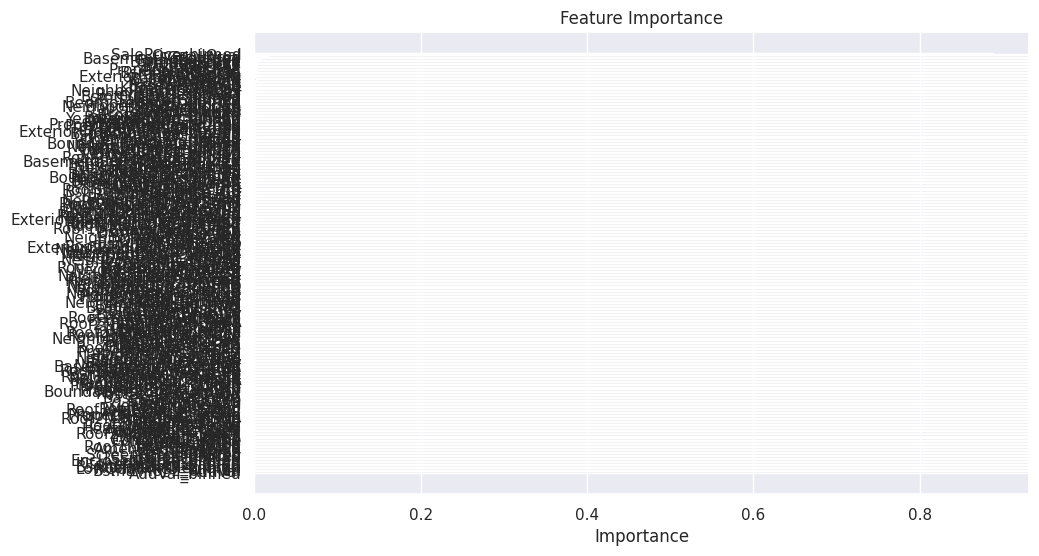

Top 10 significant features:


Feature  Importance
74   SalePrice_binned    0.887718
4         OverallQual    0.017350
16          GrLivArea    0.017256
27  BasementSqFootage    0.007099
9        BsmntFinSty1    0.005714
12       BsmntSqFtage    0.003881
3        PropertySize    0.003582
13           1stFlrSF    0.003534
28         WoodDeckSF    0.003403
14           2ndFlrSF    0.003013

In [81]:
 #Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Extract feature importance
feature_importance = rf_model.feature_importances_

# Create a DataFrame to store feature importance along with feature names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()

# Print top N significant features
top_n_features = 10  # Specify the number of top features to display
print(f'Top {top_n_features} significant features:')
feature_importance_df.head(top_n_features)

These significant features can provide insights into factors such as location, property size, amenities, and other characteristics that drive property prices.

- **Random Forest Regressor Performance:** The Random Forest Regressor tends to perform well in various types of datasets due to its ability to handle non-linear relationships and high dimensionality. In this case, it outperformed the other models significantly, suggesting that the relationships between the features and the target variable are complex and possibly non-linear.
- **Linear Regression Performance:** The poor performance of Linear Regression, indicated by the negative R^2 score, suggests that the assumptions of linear relationships between features and target might not hold in this dataset. It's likely that the data has non-linear relationships that Linear Regression cannot capture effectively.
- **KNN and SVR Performance:** Both KNN Regressor and Support Vector Regressor perform better than Linear Regression but are outperformed by the Random Forest Regressor. KNN might struggle with high-dimensional data or noise, while SVR's performance heavily depends on selecting appropriate hyperparameters and kernel functions.

**Overall, based on the evaluation metrics and the desired threshold for R^2 score, the Random Forest Regressor is the recommended model for predicting property prices in the specific location. It outperforms the other models and meets the expected R^2 score range of 75%-85%, indicating its effectiveness in capturing the variance in property prices.**